<font color=orange>**Python Hackathon December 2023**</center></font>

<div class="alert alert-block alert-success">
<b><p><h1><center>Team 8 : Python Pioneers </center></h1> </p></b> 
</div>

<div class="alert alert-block alert-info">
<b><h3><center>Exam Stress Analysis</center></h3></b> 
</div>

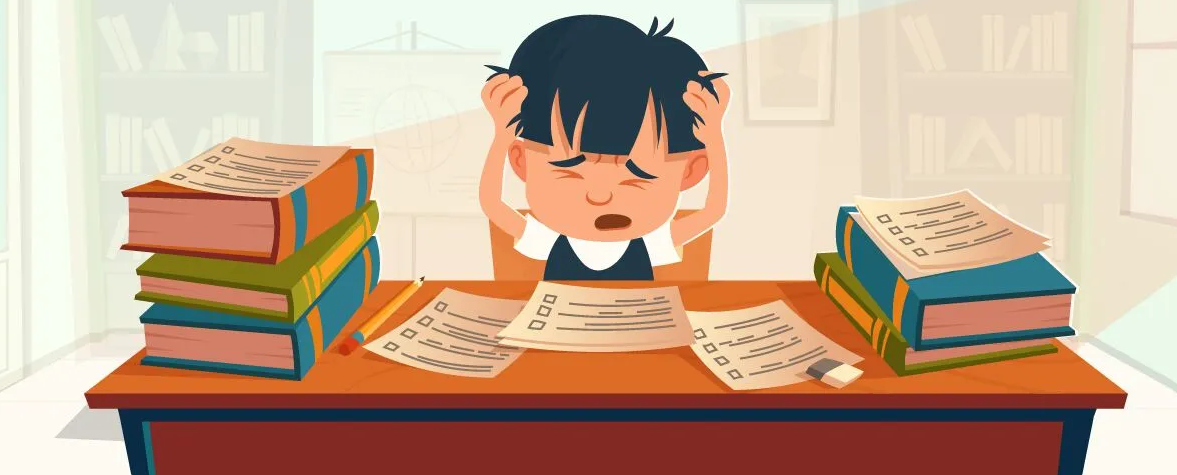

**<h3>Table of Content</h3>**
- [x] Introduction Exam Stress Analysis Dataset
- [x] Importing Data and Libraries
- [x] Hackathon Problem Statements (1-80)
- [x] Reference

# Introduction Exam Stress Analysis Dataset

The data contains electrodermal activity, heart rate, blood volume pulse, skin surface temperature, inter beat interval and accelerometer data recorded during three exam sessions (midterm 1, midterm 2 and final) as well as their corresponding grades. 

- <h3><p>Data Description</h3></P>

     *  Demographics  : Includes all patient details, masked for privacy
     *  IBI(Inter Beat Interval)  : Records the number of milliseconds that have passed between one heart beat and the next. The device records at 10 millisecond intervals sampled at the rate of 4 per minute.This dataset has been aggregated to 1 minute each.
     *  RMSSD  : Root mean square of Successive Standard Deviations from mean IBI.Must be calculated as 30 successive minutes of IBI averaged by student per exam
     *  HRV(Heart rate variability)  :Not the same as variation around a mean. HRV is the abiilty of the heart to respond to changes in blood flow demands within one beat. Since RMSSD is calculated for 30 minutes, Final Exams are 3 hours and Mid-terms are 1.5 hours. 600ms * RMSSD must be adjusted for this difference. 
     *  Time In Minutes  : Time elapsed from the start of the exam.The original unix timestamp has been converted to a simple minute ID to help you see how many minutes have elapsed from the start of each exam
     *  EDA(Electro Dermal activity)  : Electric signals that show nervous system activity. For the purpose of this hackathon, you can assume that higher actiivity indicates higher levels of stress
     *  HR(Heart rate)  : Averaged to number of beats for the corresponding minute
     *  Temp  : Basal Body temperature.Averaged to body temp for the corresponding minute


# Importing Data and Libraries

<h4>Python Libraries used for our Anlayis</h4>

In [17]:
# pip install panda
# pip install matplotlib
# pip install numpy
# pip install seaborn
# pip install colorama
# pip install wordcloud
# pip install plotly
#pip install pandas psycopg2

In [18]:
import pandas as pd
import numpy as np
import random as random
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

<h4>Importing Exam Stress Dataset</h4>

In [27]:
df_Grades = pd.read_excel("Exam Stress Final.xlsx")
df_Demography =pd.read_excel("Exam Stress Final.xlsx",sheet_name="Demography")
df_EDA =pd.read_excel("Exam Stress Final.xlsx",sheet_name="EDA")
df_HR =pd.read_excel("Exam Stress Final.xlsx",sheet_name="HR")
df_Temp =pd.read_excel("Exam Stress Final.xlsx",sheet_name="Temp")
df_IBI=pd.read_excel("Exam Stress Final.xlsx",sheet_name="IBI")

# Hackathon Problem Statements (1-80)

<div class="alert alert-block alert-warning">
<b>Q1 :</b>Using the mean interbeat interval per minute, calculate the Root Mean Square of successive differences for any 30 minute interval and add this to IBI
</div>

In [25]:
def calculate_diff(ibi_values):
    return np.diff(ibi_values)

def square_diff(differences):
    return np.square(differences)

def calculate_mean_squared_diff(squared_diff):
    return np.mean(squared_diff)


def calculate_rmssd(mean_squared_diff):
    return round(np.sqrt(mean_squared_diff)*600,2)


def calculate_rmssd_from_ibi(ibi_values):
    differences = calculate_diff(ibi_values)
    squared_diff = square_diff(differences)
    mean_squared_diff = calculate_mean_squared_diff(squared_diff)
    rmssd = calculate_rmssd(mean_squared_diff)
    return rmssd


# Load the DataFrame from Excel file
df_IBI_rmssd = pd.read_excel("Exam Stress Final.xlsx", sheet_name="IBI")

# Define the bin size for grouping (e.g., 30 minutes)
bin_size = 30

# Create bins using pd.cut
df_IBI_rmssd['bin(30 min Interval)'] = pd.cut(df_IBI_rmssd['Time in mins'], bins=range(0, df_IBI_rmssd['Time in mins'].max() + bin_size, bin_size), right=False)

# Group by the 'bin' column and calculate the mean for each group

#grouped_data = df_IBI_rmssd.groupby(['bin(30 min Interval)','Student_id', 'Exam']).mean()
grouped_data = df_IBI_rmssd.groupby(['bin(30 min Interval)']).mean().reset_index()

# Fill missing values in the DataFrame 'grouped_data'.
# The method 'fillna()' is used to handle NaN (Not a Number) values.
# Use the 'bfill' (backward fill) method to replace NaN values.

grouped_data = grouped_data.fillna(method='bfill')


# Calculating RMSSD for the 30-minute interval
ibi_values=grouped_data['IBI']

# Calculate RMSSD
rmssd = calculate_rmssd_from_ibi(ibi_values)

# Adding RMSSD to the last value of the 30-minute interval
grouped_data['IBI with RMSSD'] = grouped_data['IBI'] + rmssd

# Display the mean interbeat interval,RMSSD at 30 min interval
print("Root Mean Square Standard Deviation(RMSSD):\n\n", rmssd)

columns=['bin(30 min Interval)','IBI','IBI with RMSSD']
ibi_with_rmssd=grouped_data[columns]
ibi_with_rmssd.head(12)

Root Mean Square Standard Deviation(RMSSD):

 40.22


bin(30 min Interval)       IBI  IBI with RMSSD
0               [0, 30)  0.483357       40.703357
1              [30, 60)  0.599263       40.819263
2              [60, 90)  0.636814       40.856814
3             [90, 120)  0.648348       40.868348
4            [120, 150)  0.652954       40.872954
5            [150, 180)  0.600565       40.820565
6            [180, 210)  0.634305       40.854305
7            [210, 240)  0.542258       40.762258
8            [240, 270)  0.517917       40.737917
9            [270, 300)  0.517917       40.737917
10           [300, 330)  0.517917       40.737917
11           [330, 360)  0.375000       40.595000

<div class="alert alert-block alert-warning">
<b>Q2 :</b>Group the rows in the file EDA into 3 parts based on time: First, Second, Third part of each exam
</div>

In [21]:
df_eda_2 =pd.read_excel("Exam Stress Final.xlsx", sheet_name="EDA")

# Create a new column 'time bin' by cutting the 'Time' column into three bins
# and assigning labels 'First', 'Second', 'Third' to each bin for each exam
df_eda_2['time bin'] = df_eda_2.groupby('Exam')['Time in mins'].transform(lambda x: pd.cut(x, 3, labels=['First', 'Second', 'Third']))

df_eda_grouped =df_eda_2.groupby(['Student_id','Exam','time bin'])['EDA'].mean().reset_index()

# Print the resulting DataFrame
df_eda_grouped.head(20)


Student_id       Exam time bin       EDA
0         S01      final    First  0.156556
1         S01      final   Second  0.104643
2         S01      final    Third  0.025539
3         S01  midterm 1    First  0.159352
4         S01  midterm 1   Second  0.638200
5         S01  midterm 1    Third  0.105356
6         S01  midterm 2    First  0.111443
7         S01  midterm 2   Second  0.155692
8         S01  midterm 2    Third  0.025000
9        S010      final    First  0.163722
10       S010      final   Second  0.119490
11       S010      final    Third  0.021392
12       S010  midterm 1    First  0.089099
13       S010  midterm 1   Second  0.340871
14       S010  midterm 1    Third  0.171189
15       S010  midterm 2    First  0.168772
16       S010  midterm 2   Second  0.283038
17       S010  midterm 2    Third  0.020186
18        S02      final    First  0.132389
19        S02      final   Second  0.083455

In [22]:
df_eda_group=df_EDA.copy()
df_eda_group['time bin']=df_eda_group.groupby(['Exam','Student_id'])['Time in mins'].transform(lambda x: pd.cut(x, 3, labels=['First', 'Second', 'Third']))
df_eda_group

EDA  Time in mins Student_id       Exam time bin
0     0.040             1        S01      final    First
1     0.024             2        S01      final    First
2     0.024             3        S01      final    First
3     0.024             4        S01      final    First
4     0.024             5        S01      final    First
...     ...           ...        ...        ...      ...
7369  0.021           212       S010  midterm 2    Third
7370  0.021           213       S010  midterm 2    Third
7371  0.021           214       S010  midterm 2    Third
7372  0.021           215       S010  midterm 2    Third
7373  0.021           216       S010  midterm 2    Third

[7374 rows x 5 columns]

In [23]:
df_eda_group=df_EDA.copy()
df_eda_group['time bin']=df_eda_group.groupby(['Exam','Student_id'])['Time in mins'].transform(lambda x: pd.cut(x, 3, labels=['First', 'Second', 'Third']))
df_eda_group

EDA  Time in mins Student_id       Exam time bin
0     0.040             1        S01      final    First
1     0.024             2        S01      final    First
2     0.024             3        S01      final    First
3     0.024             4        S01      final    First
4     0.024             5        S01      final    First
...     ...           ...        ...        ...      ...
7369  0.021           212       S010  midterm 2    Third
7370  0.021           213       S010  midterm 2    Third
7371  0.021           214       S010  midterm 2    Third
7372  0.021           215       S010  midterm 2    Third
7373  0.021           216       S010  midterm 2    Third

[7374 rows x 5 columns]

<div class="alert alert-block alert-warning">
<b>Q3 :</b>Based on the calculation in question 2, which part of the exam did students suffer maximum stress? You may assume that higher recorded skin conductance co-incides with high levels of stress
</div>

In [26]:
idx = df_eda_group.groupby(['Student_id','Exam'])['EDA'].transform(max) == df_sridevi['EDA']
df_eda_group[idx]


NameError: name 'df_sridevi' is not defined

<div class="alert alert-block alert-warning">
<b>Q4 :</b>Using Root Mean Square of Successive differences calculated in Q1, calculate and store HRV per exam for every student. 
</div>

In [28]:
def calculate_diff(ibi_values):
    return np.diff(ibi_values)

def square_diff(differences):
    return np.square(differences)

def calculate_mean_squared_diff(squared_diff):
    return np.mean(squared_diff)


def calculate_rmssd(mean_squared_diff):
    return round(np.sqrt(mean_squared_diff)*600,2)


def calculate_rmssd_from_ibi(ibi_values):
    differences = calculate_diff(ibi_values)
    squared_diff = square_diff(differences)
    mean_squared_diff = calculate_mean_squared_diff(squared_diff)
    rmssd = calculate_rmssd(mean_squared_diff)
    return rmssd

def calculate_hrv(rmssd_values):
    hrv = 1000 / (2 * rmssd_values) 
    return hrv


# Load the DataFrame from Excel file
df_IBI_rmssd = pd.read_excel("Exam Stress Final.xlsx", sheet_name="IBI")

# Define the bin size for grouping (e.g., 30 minutes)
bin_size = 30

# Create bins using pd.cut
df_IBI_rmssd['bin(30 min Interval)'] = pd.cut(df_IBI_rmssd['Time in mins'], bins=range(0, df_IBI_rmssd['Time in mins'].max() + bin_size, bin_size), right=False)

# Group by the 'bin' column and calculate the mean for each group

grouped_data = df_IBI_rmssd.groupby(['Student_id', 'Exam']).mean().reset_index()
#grouped_data = df_IBI_rmssd.groupby(['bin(30 min Interval)']).mean().reset_index()

# Fill missing values in the DataFrame 'grouped_data'.
# The method 'fillna()' is used to handle NaN (Not a Number) values.
# Use the 'bfill' (backward fill) method to replace NaN values.

grouped_data = grouped_data.fillna(method='bfill')


# Calculating RMSSD for the 30-minute interval
ibi_values= grouped_data['IBI'] 

# Calculate RMSSD
rmssd = calculate_rmssd_from_ibi(ibi_values)

# Adding RMSSD to the last value of the 30-minute interval
grouped_data['IBI with RMSSD'] = grouped_data['IBI'] + rmssd

rmssd_values =grouped_data['IBI with RMSSD']

# Calculate HRV
grouped_data['HRV'] = calculate_hrv(rmssd_values)

# Display the mean interbeat interval,RMSSD at 30 min interval
print("Root Mean Square Standard Deviation(RMSSD) at 30 min interval per student:\n\n", rmssd)

columns = ['Student_id','Exam','HRV']
Heart_Rate_Variability=grouped_data[columns]
print("\nHRV per exam for every student:")
Heart_Rate_Variability

Root Mean Square Standard Deviation(RMSSD) at 30 min interval per student:

 92.14

HRV per exam for every student:


Student_id       Exam       HRV
0         S01      final  5.392687
1         S01  midterm 1  5.397426
2         S01  midterm 2  5.396437
3        S010      final  5.385443
4        S010  midterm 1  5.397822
5        S010  midterm 2  5.388753
6         S02      final  5.393460
7         S02  midterm 1  5.395402
8         S02  midterm 2  5.390400
9         S03      final  5.388602
10        S03  midterm 1  5.393350
11        S03  midterm 2  5.389476
12        S04      final  5.381379
13        S04  midterm 1  5.397707
14        S04  midterm 2  5.387015
15        S05      final  5.390156
16        S05  midterm 1  5.396701
17        S05  midterm 2  5.394850
18        S06      final  5.380745
19        S06  midterm 1  5.397265
20        S06  midterm 2  5.386464
21        S07      final  5.384205
22        S07  midterm 1  5.397648
23        S07  midterm 2  5.389336
24        S08      final  5.391491
25        S08  midterm 1  5.400996
26        S08  midterm 2  5.393093
27        S09      final  5.383873
28        S09  midterm 1  5.396614
29        S09  midterm 2  5.387231

<div class="alert alert-block alert-warning">
<b>Q5 :</b>Join all tables to produce one file that contains all student 1's readings for IBI, EDA , HR and temp
</div>

In [29]:
df_eda_hr=pd.merge(df_EDA,df_HR, on=['Student_id','Time in mins','Exam'], how='outer')
eda_01=df_eda_hr[['Student_id','Time in mins','Exam','EDA','HR']]
eda_01=eda_01.loc[eda_01['Student_id'] == 'S01']

df_temp_ibi=pd.merge(df_Temp,df_IBI,on=['Student_id','Time in mins','Exam'],how='outer')
df_temp_ibi=df_temp_ibi[['Student_id','Time in mins','Exam','TEMP','IBI']]
df_temp_ibi=df_temp_ibi.loc[df_temp_ibi['Student_id']=='S01']

df_hr_eda_temp_ibi=pd.merge(eda_01,df_temp_ibi,on=['Student_id','Time in mins','Exam'],how='outer')
df_hr_eda_temp_ibi

Student_id  Time in mins       Exam    EDA       HR    TEMP    IBI
0           S01           1.0      final  0.040  119.023  22.080  0.473
1           S01           2.0      final  0.024  130.879  22.048    NaN
2           S01           3.0      final  0.024  131.586  22.022  0.444
3           S01           4.0      final  0.024  109.852  22.339  0.496
4           S01           5.0      final  0.024   81.178  22.416    NaN
...         ...           ...        ...    ...      ...     ...    ...
1129        S01         184.0  Midterm 2    NaN  129.484  22.462    NaN
1130        S01         185.0  Midterm 2    NaN  133.889  22.469    NaN
1131        S01           0.0      final    NaN      NaN     NaN  0.446
1132        S01           0.0  midterm 1    NaN      NaN     NaN  0.422
1133        S01           0.0  midterm 2    NaN      NaN     NaN  0.359

[1134 rows x 7 columns]

<div class="alert alert-block alert-warning">
<b>Q6 :</b>Calulate the age and Display Age and drop the Date of Birth with  iteratively.  (Replace DOB for other questions when complete)
</div>

In [30]:
df_Demography_copy=df_Demography.copy()
df_Demography_copy = df_Demography_copy.assign(Age=pd.Series([]))


for i in range(0,len(df_Demography_copy.axes[0])):
    Age=datetime.now().year-(df_Demography_copy.loc[i,'DOB'].year)
    df_Demography_copy.loc[i,'Age']=Age

df_demography_age=df_Demography_copy.drop('DOB', axis=1)
print(df_demography_age)
    

  Student_id First Name  Last Name Gender     Race   Age
0        S01    Barbara    Walters      F    White  14.0
1        S02       Nora      Jones      F    White  14.0
2        S03    Gabriel    Willows      F    Asian  14.0
3        S04       John        Doe      M    Asian  14.0
4        S05       Jane        Doe      F  African  14.0
5        S06        Pat     Murray      M  African  15.0
6        S07      Roger  Frederick      M  African  13.0
7        S08       John      Wills      M    White  14.0
8        S09       Paul    Cartney      M    White  14.0
9        S10     Janice      Smith      F  Spanish  14.0


<div class="alert alert-block alert-warning">
<b>Q7 :</b>Using numpy functions, transpose and multiply the following arrays
a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2) 
</div>

In [31]:
a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2) 

transpose_a=np.transpose(a)
transpose_b=np.transpose(b)
product_array=np.matmul(transpose_a,transpose_b)

print(product_array)



[[ 2  6 10]
 [ 3 11 19]]


<div class="alert alert-block alert-warning">
<b>Q8 :</b>Write a Python program to create an array of 5 integers and display the array items in reverse order
</div>

In [32]:
int_array=[1,2,3,4,5]
print(int_array[::-1])

[5, 4, 3, 2, 1]


<div class="alert alert-block alert-warning">
<b>Q9 :</b>What was the average grade for all students in the final exam vs both midterms
</div>

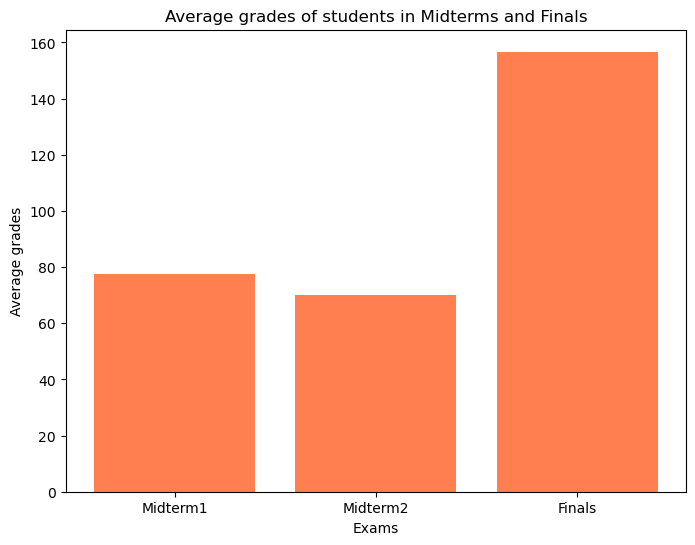

In [33]:
df_grade_copy=df_Grades.copy()

Average_midterm1=df_grade_copy['Midterm 1'].mean()
Average_midterm2=df_grade_copy['Midterm 2'].mean()
Average_finals=df_grade_copy['final'].mean()

data=[['Midterm1',Average_midterm1],['Midterm2',Average_midterm2],['Finals',Average_finals]]
average_grades=pd.DataFrame(data,columns=['Exams','Averages'])
plt.figure(figsize=(8, 6))
plt.bar(average_grades['Exams'],average_grades['Averages'] ,color='coral')
plt.xlabel('Exams')
plt.ylabel('Average grades')
plt.title('Average grades of students in Midterms and Finals')
plt.show()

<div class="alert alert-block alert-warning">
<b>Q10 :</b>Which students basal body temperature was highest during the second part of the exam?
</div>

In [34]:
df_temp_copy=df_Temp.copy()
df_temp_copy['time bin']=df_temp_copy.groupby(['Exam','Student_id'])['Time in mins'].transform(lambda x: pd.cut(x, 3, labels=['First', 'Second', 'Third']))

df_temp_second=df_temp_copy.loc[df_temp_copy['time bin'] == 'Second']

idx = df_temp_second.groupby('Exam')['TEMP'].transform(max) == df_temp_second['TEMP']
df_temp2=df_temp_second[idx]
df_student_details=pd.merge(df_temp2,df_Demography, on='Student_id')
df_student_details[['Student_id','First Name','Last Name','TEMP','Exam','time bin']]

Student_id First Name Last Name    TEMP       Exam time bin
0        S02       Nora     Jones  36.042      final   Second
1        S02       Nora     Jones  34.186  Midterm 1   Second
2        S02       Nora     Jones  35.134  Midterm 2   Second
3        S02       Nora     Jones  35.134  Midterm 2   Second

<div class="alert alert-block alert-warning">
<b>Q11 :</b>What are the top 3 grades in the final exam? What % of the top 3 grades belonged to males vs females? 
</div>

In [35]:
top3_Grades = df_Grades.nlargest(3, 'final')
df_student_details=pd.merge(top3_Grades,df_Demography, on='Student_id')
df_temp=df_student_details[['Student_id','final','Gender']]
df_gender_count = df_temp.groupby(['Gender']).agg(count=('Gender','count'))

def calculate_Percentage(df):
    total_count=3
    df['Percentage']=(df['count']/total_count)*100
    return df

df_gender_count=calculate_Percentage(df_gender_count.copy())
df_gender_percentage=df_gender_count[['Percentage']]

print(df_gender_percentage)

        Percentage
Gender            
F        66.666667
M        33.333333


<div class="alert alert-block alert-warning">
<b>Q12:</b>phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Joe
</div>

In [36]:
phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}
key="Joe"
default_value='{} phone number not found'.format(key)
print(phonebook.get(key, default_value))

Joe phone number not found


<div class="alert alert-block alert-warning">
<b>Q13 :</b>How many minutes did the midterm 2 last( on average) for all 10 students
</div>

In [37]:
value='midterm 2'
eda_midterm=df_EDA.query("Exam == @value")
exam_time = eda_midterm.groupby(['Student_id','Exam']).agg(total_time=('Time in mins', 'max'))
Average_midterm2_time=exam_time.agg(Average_examtime=('total_time','mean'))
print(Average_midterm2_time)

                  total_time
Average_examtime       201.4


<div class="alert alert-block alert-warning">
<b>Q14 :</b>Analyze the trend of body temp at the start of the exam. Were body temperatures higher or lower in the first part of the exam. What is the overall trend?
</div>

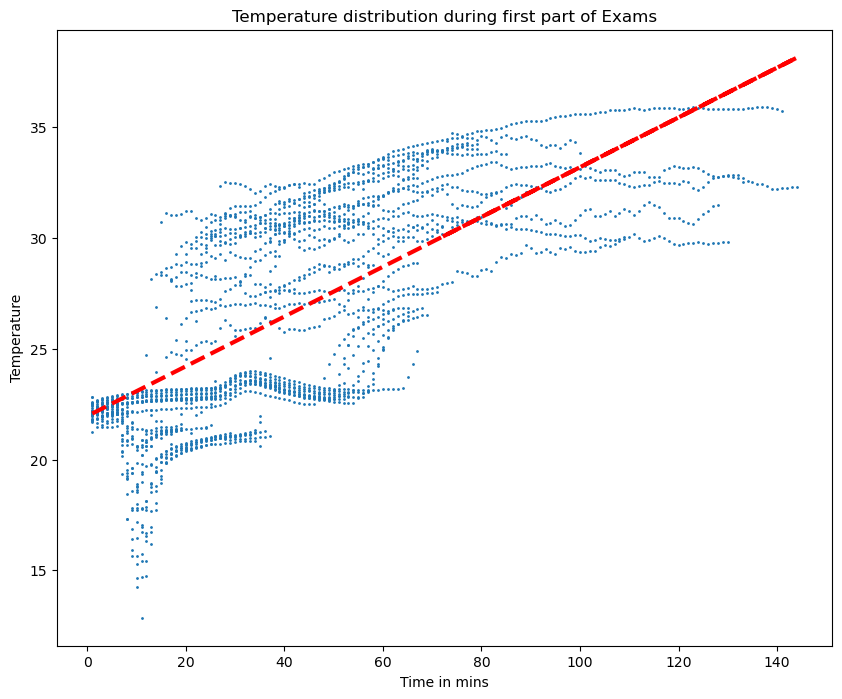

In [38]:
df_temp_first=df_temp_copy.loc[df_temp_copy['time bin'] == 'First']
df_temp_first
plt.figure(figsize=(10, 8))
plt.scatter(df_temp_first['Time in mins'],df_temp_first['TEMP'],s=1)
plt.xlabel('Time in mins')
plt.ylabel('Temperature')
plt.title('Temperature distribution during first part of Exams')
z = np.polyfit(df_temp_first['Time in mins'],df_temp_first['TEMP'], 1)
p = np.poly1d(z)
plt.plot(df_temp_first['Time in mins'], p(df_temp_first['Time in mins']),color="red", linewidth=3, linestyle="--")
plt.show()

<div class="alert alert-block alert-warning">
<b>Q15 :</b>What % of all students had a HR>80 and an HRV'<'30 in the second part of the finals?
</div>

In [39]:
df_x=df_HR[(df_HR['Exam']=='final') & (df_HR['HR']>80)]
df_x['Time_Bin'] = pd.cut(df_x['Time in mins'], 3, labels=['First', 'Second', 'Third'], right=False)

grouped_df = df_x.groupby(['Student_id', 'Time_Bin'], as_index=False).filter(lambda x: (x['HR'] > 80).all() and (x['Time_Bin'] == 'Second').all())


result_df=pd.merge(grouped_df,Heart_Rate_Variability, on=['Student_id','Exam'])
result_df=result_df[result_df['HRV']<30]
result_df

no_of_hr_students=result_df['Student_id'].nunique()

total_students=df_HR['Student_id'].nunique()

percentage_of_students=(no_of_hr_students/total_students)*100

print(" % of all students had a HR>80 and an HRV'<'30 in the second part of the finals is ",percentage_of_students)


 % of all students had a HR>80 and an HRV'<'30 in the second part of the finals is  100.0


<div class="alert alert-block alert-warning">
<b>Q16 :</b>What was the % difference between scores in both mid-terms vs the final
</div>

In [40]:
df_grades_comparision=df_Grades.copy()
df_grades_comparision['M1vsF']=round((((df_grades_comparision['final']-df_grades_comparision['Midterm 1'])/(df_grades_comparision['final']+df_grades_comparision['Midterm 1']))*100),1).astype(str) + '%'
df_grades_comparision['M2vsF']=round((((df_grades_comparision['final']-df_grades_comparision['Midterm 2'])/(df_grades_comparision['final']+df_grades_comparision['Midterm 2']))*100),1).astype(str) + '%'
df_grades_comparision

Student_id  Midterm 1  Midterm 2  final  M1vsF  M2vsF
0        S01         78         82    182  40.0%  37.9%
1        S02         82         85    180  37.4%  35.8%
2        S03         77         90    188  41.9%  35.3%
3        S04         75         77    149  33.0%  31.9%
4        S05         67         77    157  40.2%  34.2%
5        S06         71         64    175  42.3%  46.4%
6        S07         64         33    110  26.4%  53.8%
7        S08         92         88    184  33.3%  35.3%
8        S09         80         39    126  22.3%  52.7%
9        S10         89         64    116  13.2%  28.9%

<div class="alert alert-block alert-warning">
<b>Q17 :</b>What % of all students are Asian?
</div>

In [41]:
#Defined a function to calculate the percentage
def asian_percentage(students):
    total_students = len(students)
    
    # Count the number of Asian students
    asian_students = students[students['Race'] == 'Asian'].shape[0]
    
    # Calculate the percentage
    asian_percentage = (asian_students / total_students) * 100
    
    return asian_percentage

percentage = asian_percentage(df_Demography)
print(f'The percentage of Asian students is: {percentage:.1f}%')


The percentage of Asian students is: 20.0%


<div class="alert alert-block alert-warning">
<b>Q18 :</b>Display the full name of all students born in 2010
</div>

In [42]:
# Filter and display full names of students born in 2010
born_2010 = df_Demography[df_Demography['DOB'].dt.year == 2010]
full_names = born_2010[['Student_id','First Name','Last Name']]

# Set a custom index
full_names.set_index('Student_id', inplace=True)

# Display the result
print("Full name(s) of students born in 2010:")
print(full_names)


Full name(s) of students born in 2010:
           First Name  Last Name
Student_id                      
S07             Roger  Frederick


<div class="alert alert-block alert-warning">
<b>Q19 :</b>What was the average HR of the students who achieved the top 3 grades in mid-term 2
</div>

In [43]:
mid_term2_grades = df_Grades[['Student_id','Midterm 2']]
heart_rate = df_HR[['Student_id','HR']]

# Group by 'StudentID' and calculate the average 'HR' for each student
average_hr_per_student = heart_rate.groupby('Student_id')['HR'].mean().reset_index()

# Merge the two DataFrames on 'StudentID'
merge_hr_grades = pd.merge(mid_term2_grades, average_hr_per_student, on='Student_id')


# Sort the DataFrame by Midterm2_Grade in descending order
sorted_grades_top3 = merge_hr_grades.sort_values(by='Midterm 2', ascending=False).head(3)

# Set a custom index
sorted_grades_top3.set_index('Student_id', inplace=True)

print("The average HR of the students who achieved the top 3 grades in mid-term 2 :")
print(sorted_grades_top3)

The average HR of the students who achieved the top 3 grades in mid-term 2 :
            Midterm 2          HR
Student_id                       
S03                90  103.283502
S08                88  105.475896
S02                85  114.313813


<div class="alert alert-block alert-warning">
<b>Q20 :</b>Use a bar chart to display the grades of every student in mid term 1
</div>

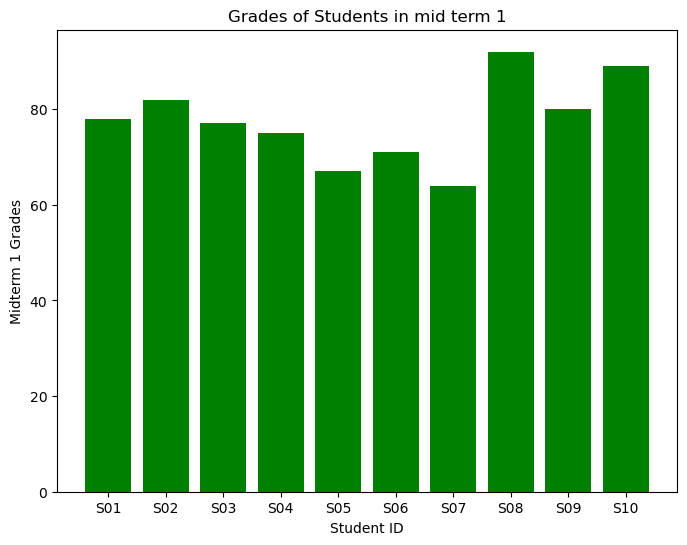

In [44]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_Grades['Student_id'], df_Grades['Midterm 1'], color='green')
plt.xlabel('Student ID')
plt.ylabel('Midterm 1 Grades')
plt.title('Grades of Students in mid term 1')
plt.show()

<div class="alert alert-block alert-warning">
<b>Q21 :</b>What % of all students are female?
</div>

In [45]:
#Defined a function to calculate the percentage of female students

def female_percentage(students):
    total_students = len(students)
    
    # Count the number of Asian students
    female_students = students[students['Gender'] == 'F'].shape[0]
    
    # Calculate the percentage
    female_percentage = (female_students / total_students) * 100
    
    return female_percentage

percentage = female_percentage(df_Demography)
print(f'The percentage of Female students is: {percentage:.1f}%')

The percentage of Female students is: 50.0%


<div class="alert alert-block alert-warning">
<b>Q22 :</b>Show the students for whom temperature fell below basal body temp of 36 degrees
</div>

In [46]:
student_temp = df_Temp[['Student_id','TEMP']]

# Group by 'StudentID' and calculate the average Temperature for each student
average_temp_per_student = student_temp.groupby('Student_id')['TEMP'].mean().reset_index()

# Set a custom index
average_temp_per_student.set_index('Student_id', inplace=True)

student_below_36 = average_temp_per_student[average_temp_per_student['TEMP']<36]

print("Students for whom temperature fell below basal body temp of 36 degrees:")
print(student_below_36)

Students for whom temperature fell below basal body temp of 36 degrees:
                 TEMP
Student_id           
S01         26.475624
S010        26.187834
S02         28.224066
S03         26.899314
S04         26.826271
S05         28.553185
S06         27.228459
S07         25.569712
S08         28.464253
S09         28.453486


<div class="alert alert-block alert-warning">
<b>Q23 :</b>Connect to sql and query the data in temp into a table of the same name
</div>

In [ ]:
pip install pandas psycopg2

In [47]:
import psycopg2 as ps
import pandas.io.sql as sqlio

conn2=ps.connect(dbname="Exam_Stress_Final",

user="postgres",password= "Neenu@PostgreSql",host="localhost",

port="5432")              
                 
#sql1=COPY PUBLIC."Temp" FROM 'C:\Program Files\PostgreSQL\15\data\Temp.csv' DELIMITER ',' CSV HEADER; 
sql= 'select * from public."Temp";'

df_Temp_Query=sqlio.read_sql_query(sql,conn2)

df_Temp_Query

Temp  Time_in_mins Student_id       Exam
0     22.080             1        S01      final
1     22.048             2        S01      final
2     22.022             3        S01      final
3     22.339             4        S01      final
4     22.416             5        S01      final
...      ...           ...        ...        ...
7369  22.344           212       S010  Midterm 2
7370  22.341           213       S010  Midterm 2
7371  22.344           214       S010  Midterm 2
7372  22.342           215       S010  Midterm 2
7373  22.346           216       S010  Midterm 2

[7374 rows x 4 columns]

<div class="alert alert-block alert-warning">
<b>Screenshot of Postgresql Connection</b>
</div>

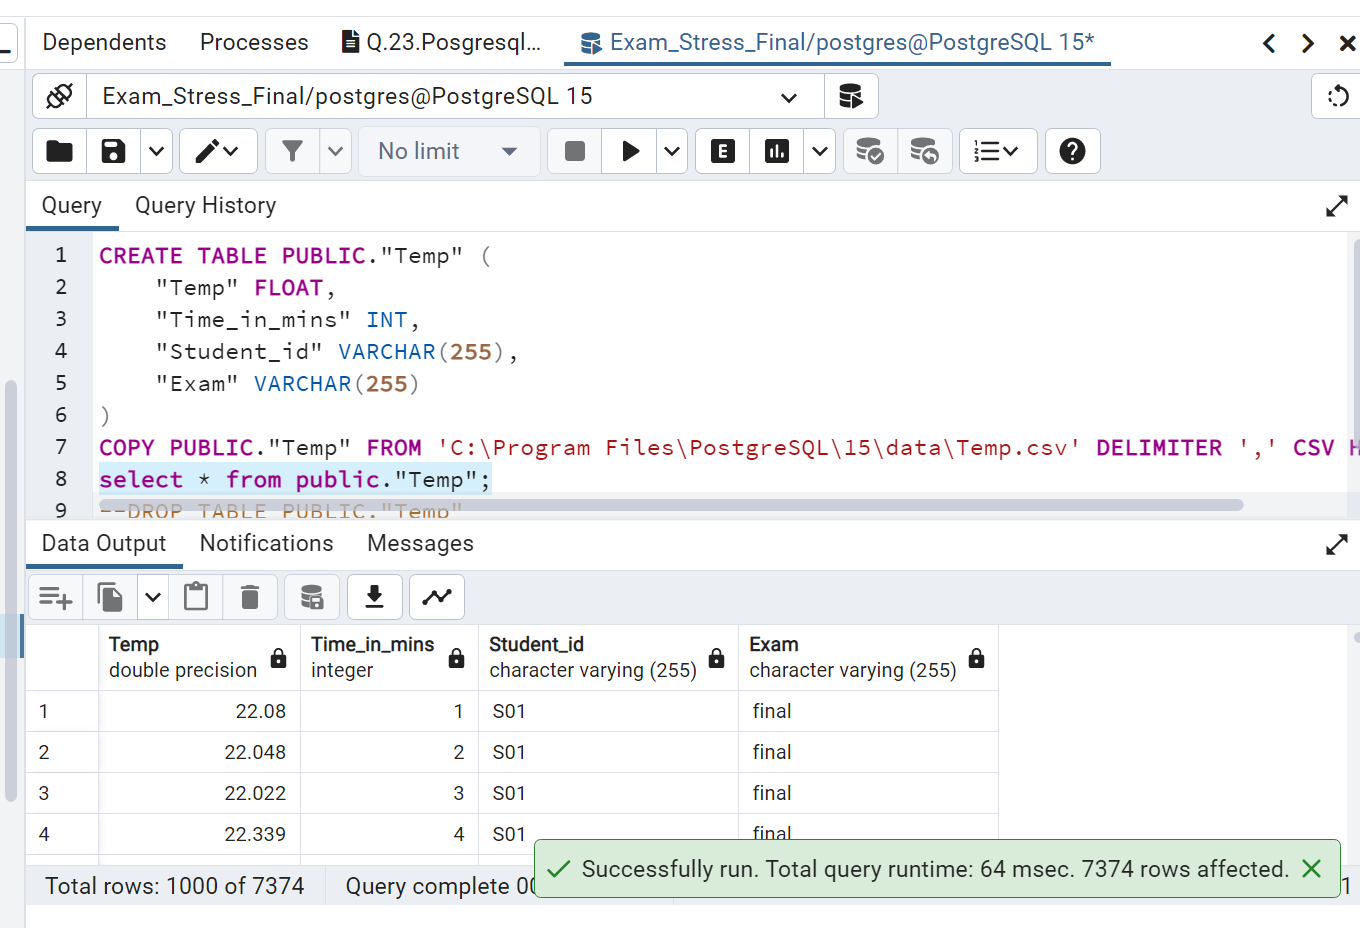

<div class="alert alert-block alert-warning">
<b>Q24 :</b>Display a sunburst chart of count of students by Age, Gender and Race
</div>

In [48]:
import pandas as pd
import plotly.express as px

from datetime import datetime
Demographics = df_Demography

# Convert 'DOB' column to datetime
Demographics['DOB'] = pd.to_datetime(Demographics['DOB'])

# Calculate the age and add it as a new column
current_date = datetime.now()
Demographics['Age'] = (current_date - Demographics['DOB']).astype('<m8[Y]')

# Create a sunburst chart
fig = px.sunburst(Demographics, path=['Age', 'Gender', 'Race'], title='Count of Students by Age, Gender, and Race')

# Show the chart
fig.show()

<div class="alert alert-block alert-warning">
<b>Q25 :</b>Create a visualization on the count of Students with an HRV 10 or more points lower than ideal HRV.
</div>

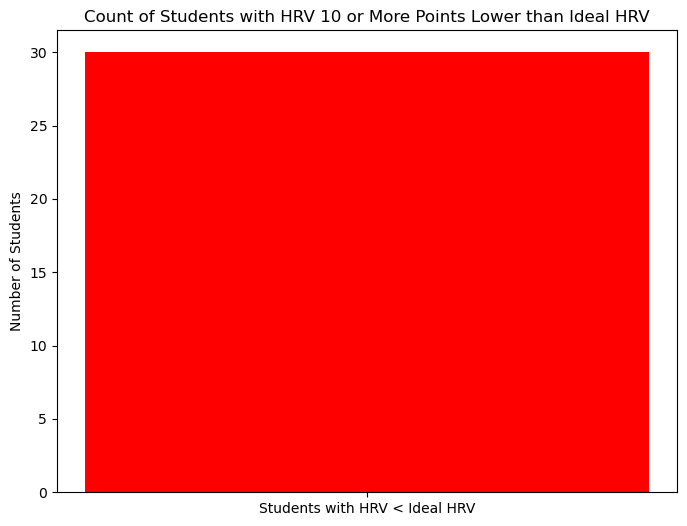

In [51]:
hrv_per_student1 = Heart_Rate_Variability.copy()

# Assuming "Ideal_HRV" is the column representing the ideal HRV for each student
ideal_hrv = 20

# Calculate the difference between HRV and Ideal_HRV
hrv_per_student1['HRV_Difference'] = hrv_per_student1['HRV'] - ideal_hrv

# Filter students with HRV 10 or more points lower than ideal
lower_hrv_students =hrv_per_student1[hrv_per_student1['HRV_Difference'] <= -10]

# Count the number of students with lower HRV
count_lower_hrv_students = lower_hrv_students.shape[0]

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(['Students with HRV < Ideal HRV'], [count_lower_hrv_students], color='red')
plt.title('Count of Students with HRV 10 or More Points Lower than Ideal HRV')
plt.ylabel('Number of Students')
plt.show()


<div class="alert alert-block alert-warning">
<b>Q26 :</b>Plot a graph to show the distribution of score in the final exam by gender
</div>

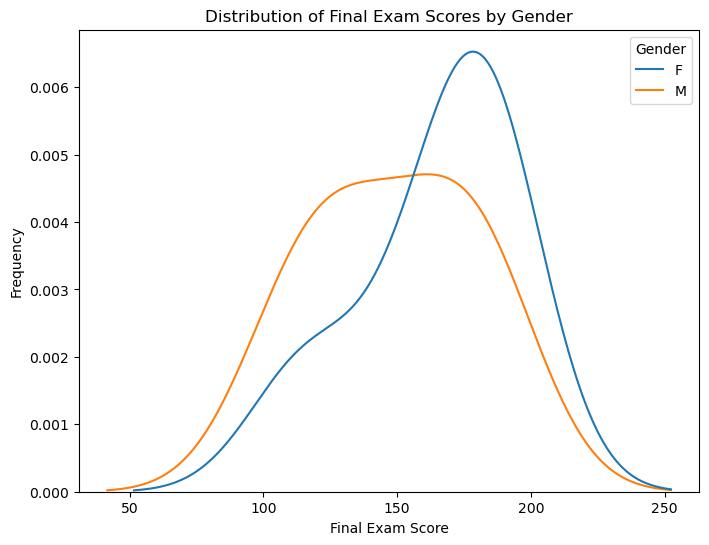

In [52]:
# Merge the two DataFrames on 'StudentID'
merge_demo_grades = pd.merge(df_Grades, df_Demography, on='Student_id')
final_exam_gender =merge_demo_grades[['Student_id','Gender','final']]
# Plot the distribution of scores in the final exam by gender
plt.figure(figsize=(8, 6))
sns.kdeplot(data=final_exam_gender, x="final", hue="Gender")
plt.title('Distribution of Final Exam Scores by Gender')
plt.xlabel('Final Exam Score')
plt.ylabel('Frequency')
plt.show()


<div class="alert alert-block alert-warning">
<b>Q27 :</b>Which demographic has the lowest average of scores in all 3 exams
</div>

In [53]:
# Merge demographics with scores
demo_grade_merge = pd.merge(df_Demography, df_Grades, on='Student_id')
# Calculate average scores for each demographic group
df_averages = demo_grade_merge.groupby(['Gender', 'Race'])['Midterm 1','Midterm 2','final'].mean()

# Find the demographic with the lowest average
lowest_average_demographic = df_averages.mean(axis=1).idxmin()
df_averages['Average Score'] = round(df_averages.mean(axis=1),2)
print("Demographics based analysis on grades:\n")
print(df_averages)

print("\nDemographic with the lowest average scores:\n")
print(lowest_average_demographic)


Demographics based analysis on grades:

                Midterm 1  Midterm 2  final  Average Score
Gender Race                                               
F      African       67.0       77.0  157.0         100.33
       Asian         77.0       90.0  188.0         118.33
       Spanish       89.0       64.0  116.0          89.67
       White         80.0       83.5  181.0         114.83
M      African       67.5       48.5  142.5          86.17
       Asian         75.0       77.0  149.0         100.33
       White         86.0       63.5  155.0         101.50

Demographic with the lowest average scores:

('M', 'African')


<div class="alert alert-block alert-warning">
<b>Q28 :</b>Delete the column age from question 12, using an iterative loop
</div>

In [54]:
from datetime import datetime
Demographics = df_Demography

# Convert 'DOB' column to datetime
Demographics['DOB'] = pd.to_datetime(Demographics['DOB'])

# Calculate the age and add it as a new column
current_date = datetime.now()
Demographics['Age'] = (current_date - Demographics['DOB']).astype('<m8[Y]')


#Deletion of 'Age' field from Demographics

Demographics1=Demographics
print("Before Deletion:")
print(Demographics1)
# List of columns to delete
columns_to_delete = ['Age']

# Delete columns using a loop
for column in columns_to_delete:
    if column in Demographics1.columns:
        Demographics1 = Demographics1.drop(column, axis=1)

# Print the DataFrame after deleting the columns
print("After Deletion:")
print(Demographics1)


Before Deletion:
  Student_id        DOB First Name  Last Name Gender     Race   Age
0        S01 2009-01-01    Barbara    Walters      F    White  14.0
1        S02 2009-02-02       Nora      Jones      F    White  14.0
2        S03 2009-07-12    Gabriel    Willows      F    Asian  14.0
3        S04 2009-09-09       John        Doe      M    Asian  14.0
4        S05 2009-05-06       Jane        Doe      F  African  14.0
5        S06 2008-04-04        Pat     Murray      M  African  15.0
6        S07 2010-08-01      Roger  Frederick      M  African  13.0
7        S08 2009-03-03       John      Wills      M    White  14.0
8        S09 2009-10-23       Paul    Cartney      M    White  14.0
9        S10 2009-11-14     Janice      Smith      F  Spanish  14.0
After Deletion:
  Student_id        DOB First Name  Last Name Gender     Race
0        S01 2009-01-01    Barbara    Walters      F    White
1        S02 2009-02-02       Nora      Jones      F    White
2        S03 2009-07-12    Gabrie

<div class="alert alert-block alert-warning">
<b>Q29 :</b>Create a heat map of HRV, temp and scores. To show the correlation beween these variables
</div>

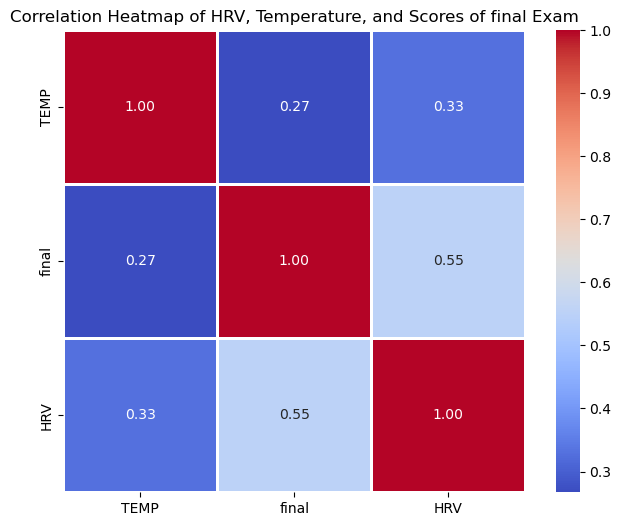

In [55]:
# Selecting relevant columns from the 'df_Temp' DataFrame
student_temp = df_Temp[['Student_id', 'TEMP']]

# Calculating the average temperature per student
average_temp_per_student = student_temp.groupby('Student_id')['TEMP'].mean().reset_index()

# Merging the average temperature data with the grades data based on 'Student_id'
temp_score = pd.merge(average_temp_per_student, df_Grades, on='Student_id')

# Selecting specific columns ('Student_id', 'TEMP', 'final') for the merged DataFrame
columns = ['Student_id', 'TEMP', 'final']
temp_score_merge = temp_score[columns]

# Filtering Heart Rate Variability (HRV) data for the 'final' exam
hrv = Heart_Rate_Variability[Heart_Rate_Variability['Exam'] == 'final']

# Merging the temperature and scores data with the HRV data based on 'Student_id'
temp_score_hrv = pd.merge(temp_score_merge, hrv, on='Student_id')

# Calculating the correlation matrix for the merged data
corr_matrix_hrv_temp_score = temp_score_hrv.corr()

# Plotting a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_hrv_temp_score, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, square=True)
plt.title('Correlation Heatmap of HRV, Temperature, and Scores of final Exam')
plt.show()


<div class="alert alert-block alert-warning">
<b>Q30 :</b>Use the dataset given and Enumerate in Python with any example.
</div>

In [56]:
# displaying Demographics of eevery female student using enumerate
import pandas as pd

# Enumerate through all rows in the Demographics dataframe
for index, row in df_Demography[df_Demography['Gender'] == 'F'].iterrows():
    #print(f"Index: {index}")
    print("Demographics of Female Students:\n")
    print(row)
    print("_________________________________")

Demographics of Female Students:

Student_id                    S01
DOB           2009-01-01 00:00:00
First Name                Barbara
Last Name                 Walters
Gender                          F
Race                        White
Age                          14.0
Name: 0, dtype: object
_________________________________
Demographics of Female Students:

Student_id                    S02
DOB           2009-02-02 00:00:00
First Name                   Nora
Last Name                   Jones
Gender                          F
Race                        White
Age                          14.0
Name: 1, dtype: object
_________________________________
Demographics of Female Students:

Student_id                    S03
DOB           2009-07-12 00:00:00
First Name                Gabriel
Last Name                 Willows
Gender                          F
Race                        Asian
Age                          14.0
Name: 2, dtype: object
_________________________________
Demographics 

<div class="alert alert-block alert-warning">
<b>Q31 :</b>Create a jointplot on EDA & Grades.
</div>

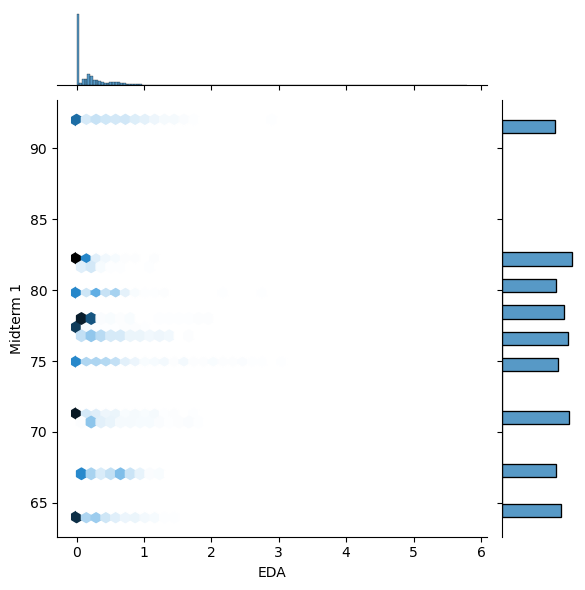

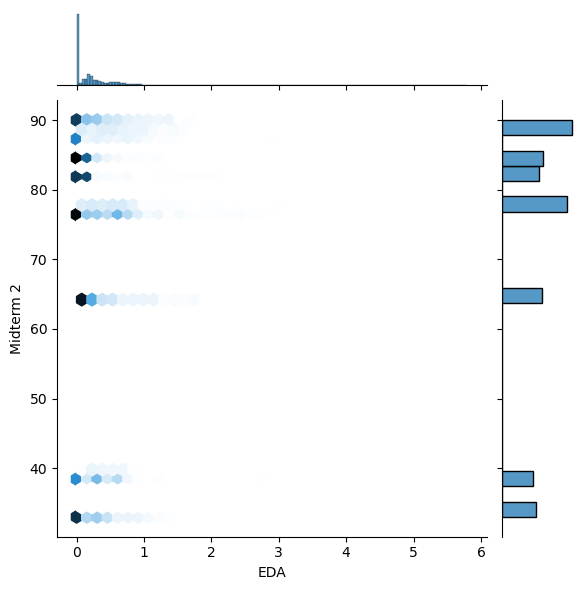

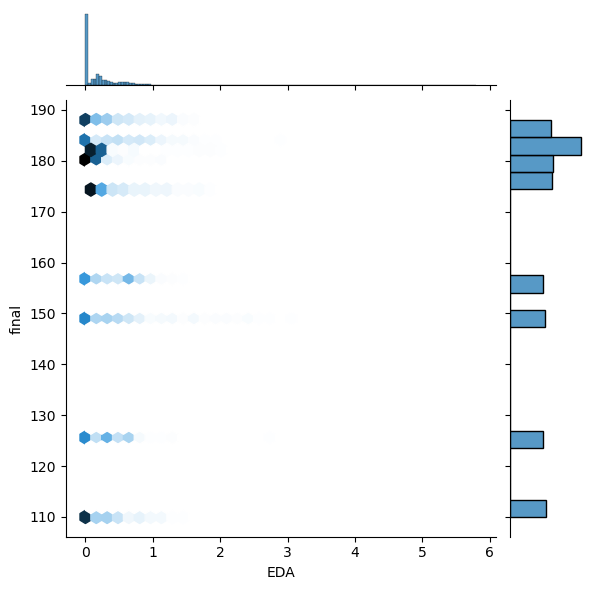

In [57]:

# Merge DataFrames on 'Stusent_id'
merged_eda_grades = pd.merge(df_EDA, df_Grades, on='Student_id')
#print(merged_eda_grades)

# Group by 'StudentID' and calculate the average 'HR' for each student
#average_EDA_student = merged_eda_grades.groupby('Student_id')['EDA'].mean().reset_index()
#print(average_EDA_student)

# Create a joint plot
sns.jointplot(data=merged_eda_grades, x='EDA', y='Midterm 1', kind='hex')
sns.jointplot(data=merged_eda_grades, x='EDA', y='Midterm 2', kind='hex')
sns.jointplot(data=merged_eda_grades, x='EDA', y='final', kind='hex')
plt.show()

<div class="alert alert-block alert-warning">
<b>Q32 :</b>Use indexing , loc to retrieve the row with maximum HR
</div>

In [58]:

# Find the index with the maximum value in 'HR' column
max_hr_index = df_HR['HR'].idxmax()

# Use loc to retrieve the row with the maximum HR
row_with_max_hr = df_HR.loc[max_hr_index]

# Display the result
print("Row with maximum HR:")
print(row_with_max_hr)

Row with maximum HR:
HR                199.278
Time in mins         41.0
Student_id            S04
Exam            Midterm 1
Name: 2720, dtype: object


<div class="alert alert-block alert-warning">
<b>Q33 :</b>Make a pivot table where Student IDs are the columns and EDA, HR and temp values are the rows
</div>

In [59]:
heart_rate = df_HR[['Student_id','HR']]
eda=df_EDA[['Student_id','EDA']]
temp=df_Temp[['Student_id','TEMP']]
# Grouping by 'StudentID' and calculate the average 'HR' for each student
average_hr_per_student = heart_rate.groupby('Student_id')['HR'].mean().reset_index()
average_eda_per_student = eda.groupby('Student_id')['EDA'].mean().reset_index()
average_temp_per_student = temp.groupby('Student_id')['TEMP'].mean().reset_index()

# Merging dataframes on 'Student_id'
merged_df = pd.merge(average_hr_per_student, average_eda_per_student, on='Student_id')
merged_df = pd.merge(merged_df, average_temp_per_student, on='Student_id')

# Creating a pivot table
pivot_table = merged_df.pivot_table(index=['EDA', 'HR', 'TEMP'], columns=['Student_id'])

pivot_table = pivot_table.reset_index()

print(pivot_table)


                 EDA          HR       TEMP
Student_id                                 
0           0.111534  114.313813  28.224066
1           0.149369  106.231091  26.187834
2           0.161171  106.522138  26.475624
3           0.208034  103.842102  25.569712
4           0.256905  104.793488  27.228459
5           0.272532  103.283502  26.899314
6           0.299416   98.802752  28.453486
7           0.370783  104.806015  28.553185
8           0.393437  105.475896  28.464253
9           0.464468   98.399456  26.826271


<div class="alert alert-block alert-warning">
<b>Q34 :</b>Display the Student Demographics and Grades who are born in leap Year
</div>

In [60]:
# Function to check if a year is a leap year
def is_leap_year(year):
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# Extract year from DOB and check for leap year
df_Demography['Year'] = df_Demography['DOB'].dt.year
df_Demography['Is_Leap_Year'] = df_Demography['Year'].apply(is_leap_year)

# Filter students born in a leap year
leap_year_students = df_Demography[df_Demography['Is_Leap_Year']]

# Merge demographics with grades
leap_year_students_with_grades = pd.merge(leap_year_students, df_Grades, on='Student_id')

# Display the result
leap_year_students_with_grades.head()

Student_id        DOB First Name Last Name Gender     Race   Age  Year  \
0        S06 2008-04-04        Pat    Murray      M  African  15.0  2008   

   Is_Leap_Year  Midterm 1  Midterm 2  final  
0          True         71         64    175

<div class="alert alert-block alert-warning">
<b>Q35 :</b>Create a Bins of Grades to segregate the students in Grades  'A','B',C'
</div>

In [61]:
df_Grades_bins=df_Grades

# bins for grading midterm score
midterm_bins = [0, 70, 85, 100]
mlabels = ['C', 'B', 'A']

# bins for grading final score
final_bins = [0, 170, 185, 200]
flabels = ['C', 'B', 'A']

df_Grades_bins['Midterm1 Grades'] = pd.cut(df_Grades_bins['Midterm 1'], bins=midterm_bins, labels=mlabels, right=False)
df_Grades_bins['Midterm2 Grades'] = pd.cut(df_Grades_bins['Midterm 2'], bins=midterm_bins, labels=mlabels, right=False)
df_Grades_bins['final Grades']    = pd.cut(df_Grades_bins['final'], bins=final_bins, labels=flabels, right=False)
df_Grades_bins

Student_id  Midterm 1  Midterm 2  final Midterm1 Grades Midterm2 Grades  \
0        S01         78         82    182               B               B   
1        S02         82         85    180               B               A   
2        S03         77         90    188               B               A   
3        S04         75         77    149               B               B   
4        S05         67         77    157               C               B   
5        S06         71         64    175               B               C   
6        S07         64         33    110               C               C   
7        S08         92         88    184               A               A   
8        S09         80         39    126               B               C   
9        S10         89         64    116               A               C   

  final Grades  
0            B  
1            B  
2            A  
3            C  
4            C  
5            B  
6            C  
7            B  
8            C  
9            C

<div class="alert alert-block alert-warning">
<b>Q36 :</b>Create a Word Cloud with First name of Student Names based on thier Race 
</div>

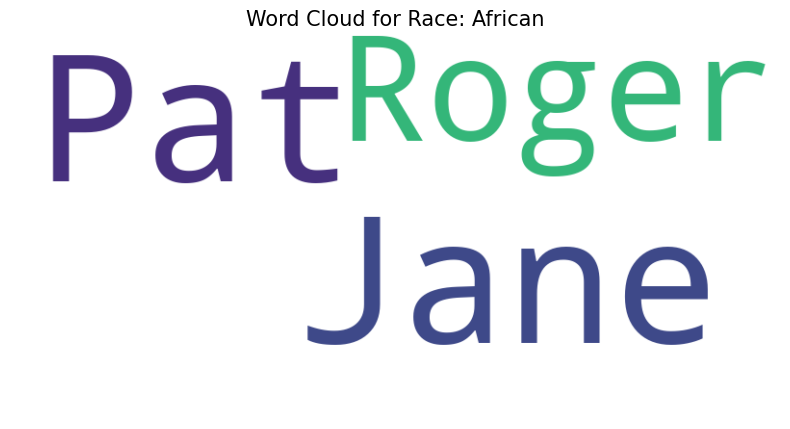

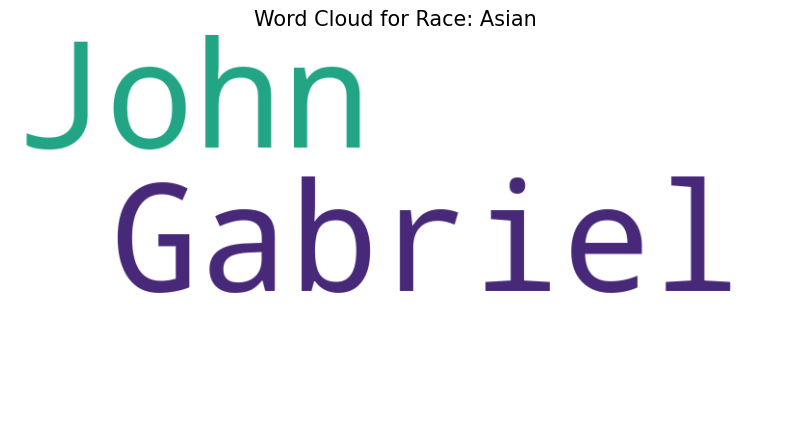

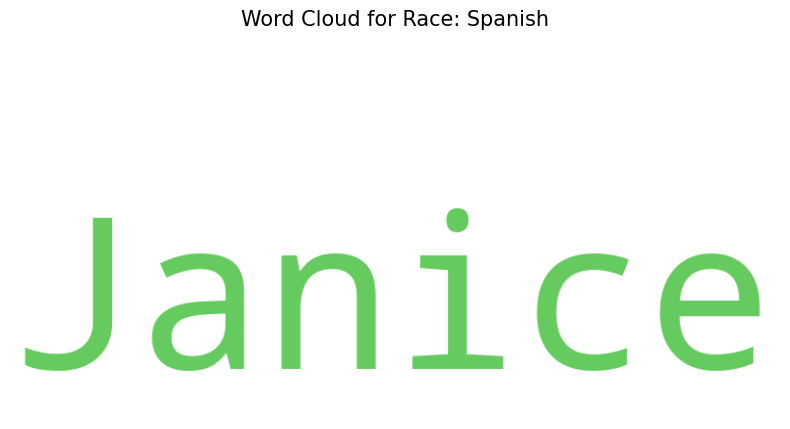

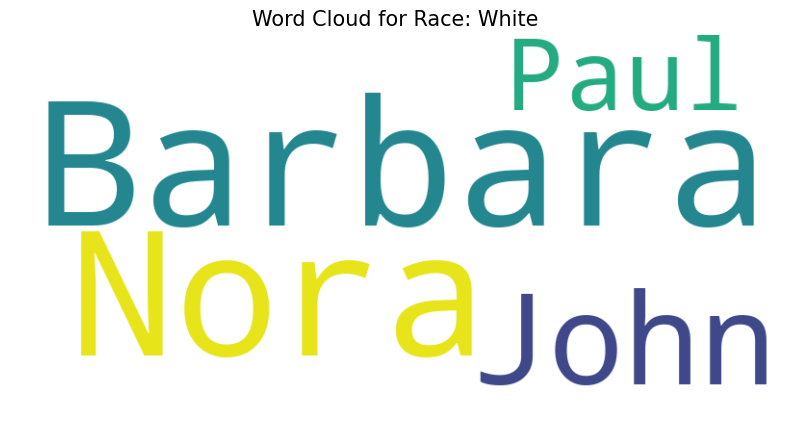

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_Demography.head()
# Grouping first names by race
grouped_names_by_race = df_Demography.groupby('Race')['First Name'].apply(' '.join)

# Display the grouped names to check
grouped_names_by_race.head()
# Function to create and display a word cloud for each race group
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()
    
    # Create and display word clouds for the first few race groups
for race, names in grouped_names_by_race.items():
    create_word_cloud(names, f"Word Cloud for Race: {race}")



<div class="alert alert-block alert-warning">
<b>Q37 :</b>Display the student Names and respective grades who has Maximum heart rate
</div>

In [63]:
df_hr_copy=df_HR.copy()

# max_hr_per_student =round(df_hr_copy['HR'],0).max()
max_hr_per_student =df_hr_copy['HR'].max()

student_max_hr =df_hr_copy[df_hr_copy['HR']==max_hr_per_student]
student_max_hr_grades=pd.merge(student_max_hr,df_Grades , on='Student_id')
columns=['Student_id','HR','Midterm 1','Midterm 2','final']
student_max_hr_grades_df=student_max_hr_grades[columns]
print("The student Names and respective grades who has Maximum heart rate:\n")
student_max_hr_grades_df

The student Names and respective grades who has Maximum heart rate:



Student_id       HR  Midterm 1  Midterm 2  final
0        S04  199.278         75         77    149

<div class="alert alert-block alert-warning">
<b>Q38 :</b>Write a Python program to get the number of occurrences of a specified element in the array.
</div>

In [64]:
def count_occurrences(array, element):
    return array.count(element)

# Example usage
array = [1, 4, 2, 7, 4, 4, 3]
element = 4

num_occurrences = count_occurrences(array, element)
print(f"The element {element} occurs {num_occurrences} times in the array.")

The element 4 occurs 3 times in the array.


<div class="alert alert-block alert-warning">
<b>Q39 :</b>Create a 3D list using nested for loops.
</div>

In [65]:
  #Displaying Each student and their scores in midterm1,midterm2,final exam in 3d list
excel_data=pd.read_excel("Exam Stress Final.xlsx")
students = excel_data['Student_id'].tolist()
midterm1_scores = excel_data['Midterm 1'].tolist()
midterm2_scores = excel_data['Midterm 2'].tolist()
final_scores = excel_data['final'].tolist()

# Creating the 3D list
# Outer list will contain a list for each student
# Each student's list will contain their scores as sub-lists
three_d_list = [[student, [midterm1, midterm2, final]] for student, midterm1, midterm2, final in zip(students, midterm1_scores, midterm2_scores, final_scores)]

# Display the elements of the 3D list 
three_d_list

[['S01', [78, 82, 182]],
 ['S02', [82, 85, 180]],
 ['S03', [77, 90, 188]],
 ['S04', [75, 77, 149]],
 ['S05', [67, 77, 157]],
 ['S06', [71, 64, 175]],
 ['S07', [64, 33, 110]],
 ['S08', [92, 88, 184]],
 ['S09', [80, 39, 126]],
 ['S10', [89, 64, 116]]]

<div class="alert alert-block alert-warning">
<b>Q40 :</b>"Array = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

Display each row of this array as a separate slice"
</div>

In [66]:
array = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# Display each row as a separate slice
for row in array:
    print(row)


[1, 2, 3]
[4, 5, 6]
[7, 8, 9]


<div class="alert alert-block alert-warning">
<b>Q41 :</b>Find the Student name and the Exam who has the Temprature '36.042'
</div>

In [67]:
# Finding the entries where the temperature is '36.042'
matching_entries = df_Temp[df_Temp['TEMP'] == 36.042]

if not matching_entries.empty:
    
    # Merge to find the student names and exams
    merged_df = pd.merge(matching_entries,df_Demography, on='Student_id')
else:
    merged_df = pd.DataFrame()

merged_df[['Student_id', 'First Name', 'Last Name', 'Exam']]


Student_id First Name Last Name   Exam
0        S02       Nora     Jones  final

<div class="alert alert-block alert-warning">
<b>Q42 :</b>Using arrays and loops, find the count of students based on gender.
</div>

In [68]:
df_Demography =pd.read_excel("Exam Stress Final.xlsx",sheet_name="Demography")
# Extract the gender column as an array
gender_array = df_Demography['Gender'].values

male_count = 0
female_count = 0

# Looping through the array and count the occurrences of each gender
for gender in gender_array:
    if gender == 'M':
        male_count += 1
    elif gender == 'F':
        female_count += 1

# Display the counts
print("Male count :",male_count)
print("Female count:", female_count)

Male count : 5
Female count: 5


<div class="alert alert-block alert-warning">
<b>Q43
    :</b>Generate Unique Student ID  using Lamda Function.
</div>

In [69]:
df_Demography =pd.read_excel("Exam Stress Final.xlsx",sheet_name="Demography")

df_Demography_unique_id=df_Demography
df_Demography_unique_id.reset_index(inplace=True)

# Generating the new unique IDs
df_Demography_unique_id['Unique_Student_ID'] = df_Demography_unique_id.apply(lambda x: x['First Name'][0] + x['Last Name'][0] + str(x['index']).zfill(4), axis=1)

# Display the updated DataFrame with the new unique IDs
df_Demography_unique_id[['Student_id', 'First Name', 'Last Name', 'Unique_Student_ID']]

Student_id First Name  Last Name Unique_Student_ID
0        S01    Barbara    Walters            BW0000
1        S02       Nora      Jones            NJ0001
2        S03    Gabriel    Willows            GW0002
3        S04       John        Doe            JD0003
4        S05       Jane        Doe            JD0004
5        S06        Pat     Murray            PM0005
6        S07      Roger  Frederick            RF0006
7        S08       John      Wills            JW0007
8        S09       Paul    Cartney            PC0008
9        S10     Janice      Smith            JS0009

<div class="alert alert-block alert-warning">
<b>Q44 :</b>Create a Box  plot for HR and Temp
</div>

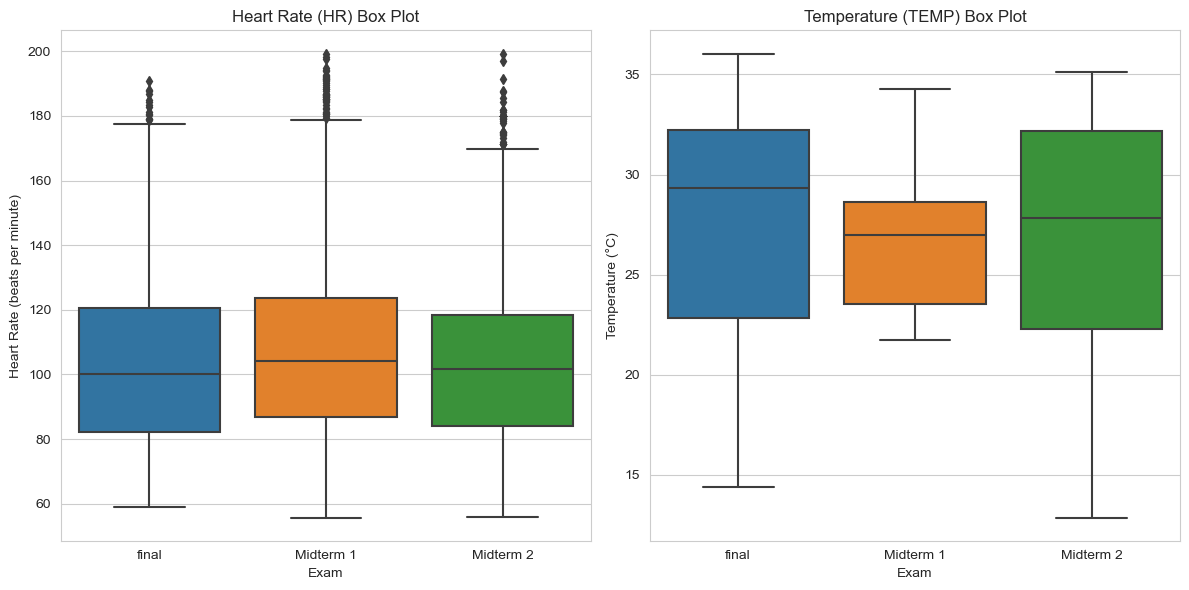

In [73]:

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Creating a box plot for HR
sns.boxplot(x='Exam', y='HR', data=df_HR, ax=axes[0])
axes[0].set_title('Heart Rate (HR) Box Plot')
axes[0].set_xlabel('Exam')
axes[0].set_ylabel('Heart Rate (beats per minute)')

# Creating a box plot for TEMP
sns.boxplot(x='Exam', y='TEMP', data=df_Temp, ax=axes[1])
axes[1].set_title('Temperature (TEMP) Box Plot')
axes[1].set_xlabel('Exam')
axes[1].set_ylabel('Temperature (°C)')

plt.tight_layout()

# Showing the plot
plt.show()


<div class="alert alert-block alert-warning">
<b>Q45 :</b>Find the student's Max mean EDA who are attending Final 
</div>

In [74]:
 
final_exam_eda = df_EDA[df_EDA['Exam'] == 'final']

# Calculate the mean EDA for each student
mean_eda_per_student = final_exam_eda.groupby('Student_id')['EDA'].mean()

# Identify the student with the highest mean EDA
student_with_max_mean_eda = mean_eda_per_student.idxmax()
max_mean_eda = mean_eda_per_student.max()

print("Student_id :",student_with_max_mean_eda)
print("Maximum EDA: ",max_mean_eda)

Student_id : S05
Maximum EDA:  0.5424094488188976


<div class="alert alert-block alert-warning">
<b>Q46 :</b>Find the Grade of a Student whose Name ends with 'S'
</div>

In [75]:
# Identifying students whose first or last name ends with 'S'
students_with_s = df_Demography[df_Demography['First Name'].str.endswith('s') | df_Demography['Last Name'].str.endswith('s')]

# Mergeing with the grades data to get their grades
students_with_s_grades = pd.merge(students_with_s, df_Grades, on='Student_id')

students_with_s_grades[['Student_id','First Name', 'Last Name',  'Midterm 1', 'Midterm 2', 'final']]


Student_id First Name Last Name  Midterm 1  Midterm 2  final
0        S01    Barbara   Walters         78         82    182
1        S02       Nora     Jones         82         85    180
2        S03    Gabriel   Willows         77         90    188
3        S08       John     Wills         92         88    184

<div class="alert alert-block alert-warning">
<b>Q47 :</b>Plot Temp analysis of all students during 1 hr of the exam (x axis time and y axis Temp)
</div>

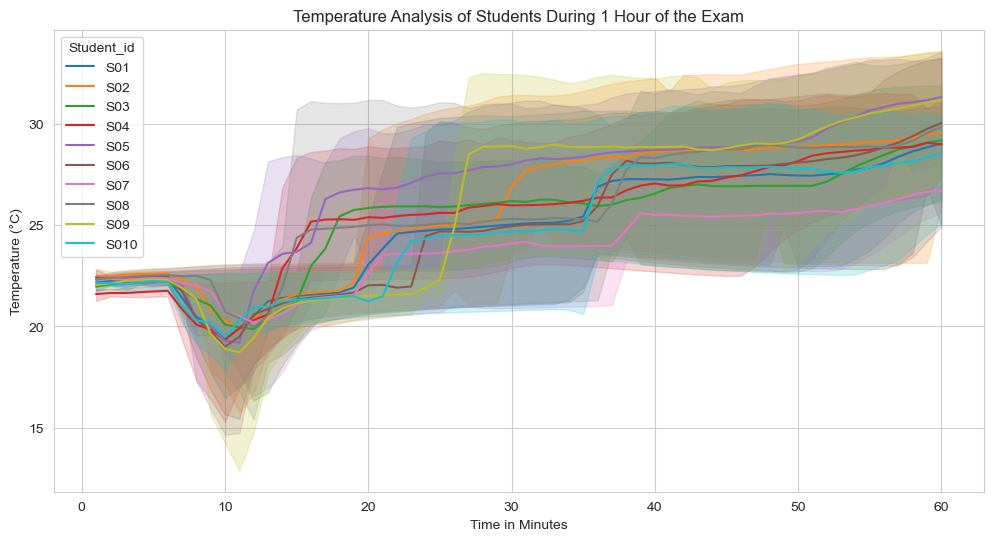

In [76]:
#Temp of all students during 1 hr of the exam
temp_df_1hr = df_Temp[df_Temp['Time in mins'] <= 60]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time in mins', y='TEMP', hue='Student_id', data=temp_df_1hr, palette="tab10", legend="full")

# Set plot title and labels
plt.title('Temperature Analysis of Students During 1 Hour of the Exam')
plt.xlabel('Time in Minutes')
plt.ylabel('Temperature (°C)')

# Show the plot
plt.show()

<div class="alert alert-block alert-warning">
<b>Q48 :</b>Find the Full Name of the student who has Max HR
</div>

In [77]:
# Find the row with the maximum heart rate in the 'df_HR' DataFrame
max_hr_row = df_HR.loc[df_HR['HR'].idxmax()]

# Extract the student ID and maximum heart rate value from the row
max_hr_student_id = max_hr_row['Student_id']
max_hr_value = max_hr_row['HR']

max_hr_student_info = df_Demography[df_Demography['Student_id'] == max_hr_student_id]

# Combine the first name and last name to get the full name of the student
full_name = max_hr_student_info['First Name'].item() + " " + max_hr_student_info['Last Name'].item()

# Print the full name of the student with the maximum heart rate
print("Full Name of the student who has Max HR:", full_name)


Full Name of the student who has Max HR: John Doe


<div class="alert alert-block alert-warning">
<b>Q49 :</b> [ "Python Hackthaon.", "December 2023.", "Numpy Ninja." ] tokenise the Sentences and place it in single column
</div>

In [78]:
import nltk
from nltk.tokenize import (wordpunct_tokenize)

# Using wordpunct_tokenize function to tokenize the sentences
Sentence = '"Python Hackthaon.","December 2023.","Numpy Ninja."'
Arr= np.array(wordpunct_tokenize(Sentence))

# Using series to place the tokenized sentences in a single column
print("The tokenized sentences are as follows: ")
pd.Series(Arr)

The tokenized sentences are as follows: 


0            "
1       Python
2    Hackthaon
3         .","
4     December
5         2023
6         .","
7        Numpy
8        Ninja
9           ."
dtype: object

<div class="alert alert-block alert-warning">
<b>Q50 :</b> Count the Students who are in the Race Group 'White'
</div>

In [79]:
#Count the number of values using Groupby                                        # Method1
count = df_Demography.groupby('Race').size()['White']
print(f"The count of Students who are in Race Group White is: {count}")

#Displaying student records
df_Demography.loc[df_Demography['Race'] == 'White']

The count of Students who are in Race Group White is: 4


index Student_id        DOB First Name Last Name Gender   Race  \
0      0        S01 2009-01-01    Barbara   Walters      F  White   
1      1        S02 2009-02-02       Nora     Jones      F  White   
7      7        S08 2009-03-03       John     Wills      M  White   
8      8        S09 2009-10-23       Paul   Cartney      M  White   

  Unique_Student_ID  
0            BW0000  
1            NJ0001  
7            JW0007  
8            PC0008

In [80]:
#Count the number of values using value_counts                                   # Method2                         
count = df_Demography['Race'].value_counts()['White']
print(f"The count of Students who are in Race Group White is: {count}")

#Displaying student records
df_Demography.loc[df_Demography['Race'] == 'White']

The count of Students who are in Race Group White is: 4


index Student_id        DOB First Name Last Name Gender   Race  \
0      0        S01 2009-01-01    Barbara   Walters      F  White   
1      1        S02 2009-02-02       Nora     Jones      F  White   
7      7        S08 2009-03-03       John     Wills      M  White   
8      8        S09 2009-10-23       Paul   Cartney      M  White   

  Unique_Student_ID  
0            BW0000  
1            NJ0001  
7            JW0007  
8            PC0008

<div class="alert alert-block alert-warning">
<b>Q51 :</b> Display the Youngest Student demographic details. with Avg Heart Rate
</div>

In [81]:
#mid_term2_grades = df_Grades[['Student_id','Midterm 2']]
heart_rate = df_HR[['Student_id','HR']]

# Group by 'StudentID' and calculate the average 'HR' for each student
average_hr_per_student = round(heart_rate.groupby('Student_id')['HR'].mean().reset_index())

# Merge the two DataFrames on 'StudentID'
merge_hr_demography = pd.merge(df_Demography_copy, average_hr_per_student, on='Student_id')


# Sort the DataFrame by Age in ascending order
sorted_age = merge_hr_demography.sort_values(by='Age', ascending=True).head(1)

# Set a custom index
sorted_age.set_index('Student_id', inplace=True)

print("The average HR of the youngest student with Demographics :\n")
print(sorted_age)

The average HR of the youngest student with Demographics :

                  DOB First Name  Last Name Gender     Race   Age     HR
Student_id                                                              
S07        2010-08-01      Roger  Frederick      M  African  13.0  104.0


<div class="alert alert-block alert-warning">
<b>Q52 :</b> Plot the Donut chart Student distrubution by Gender
</div>

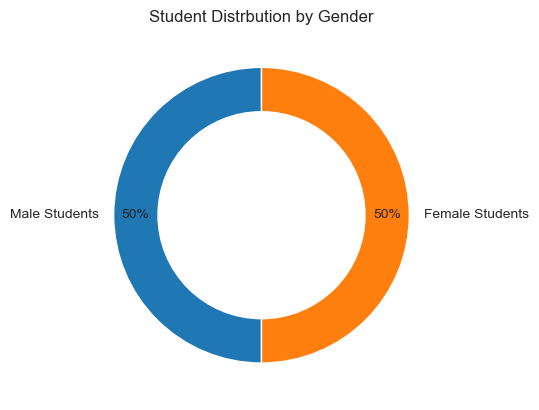

In [82]:
import matplotlib.pyplot as plt

def female_percentage(students):
    total_students = len(students)
    
    # Count the number of Female students
    female_students = students[students['Gender'] == 'F'].shape[0]
    
    # Calculate the percentage
    female_percentage = (female_students / total_students) * 100
    
    return female_percentage

percentageF = female_percentage(df_Demography)
#print(f'The percentage of Female students is: {percentageF:.1f}%')


def male_percentage(students):
    total_students = len(students)
    
    # Count the number of Male students
    male_students = students[students['Gender'] == 'M'].shape[0]
    
    # Calculate the percentage
    male_percentage = (male_students / total_students) * 100
    
    return male_percentage

percentageM = male_percentage(df_Demography)
#print(f'The percentage of Male students is: {percentageM:.1f}%')

# Create a DataFrame with the counts for the chart
df_chart = pd.DataFrame({'Male Students': percentageM, 'Female Students': percentageF}, index=[''])

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(df_chart.values.flatten(), labels=df_chart.columns, autopct='%1.0f%%', startangle=90, pctdistance=0.85)
ax.add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title('Student Distrbution by Gender')
plt.show()

<div class="alert alert-block alert-warning">
<b>Q53 :</b> Calculate the 'AGE' of the Student and Display with Student Name
</div>

In [83]:
# Creating a copy of df_Demography and assigning it to Series
df_Demography_copy=df_Demography.copy()
df_Demography_copy = df_Demography_copy.assign(Age=pd.Series([]))

# Using For loop to calculate Age
for i in range(0,len(df_Demography_copy.axes[0])):
    Age=datetime.now().year-(df_Demography_copy.loc[i,'DOB'].year)
    df_Demography_copy.loc[i,'Age']=Age

# Displaying Student Name and Age 
df_Demography_copy[['Student_id','First Name','Last Name','Age']]

Student_id First Name  Last Name   Age
0        S01    Barbara    Walters  14.0
1        S02       Nora      Jones  14.0
2        S03    Gabriel    Willows  14.0
3        S04       John        Doe  14.0
4        S05       Jane        Doe  14.0
5        S06        Pat     Murray  15.0
6        S07      Roger  Frederick  13.0
7        S08       John      Wills  14.0
8        S09       Paul    Cartney  14.0
9        S10     Janice      Smith  14.0

<div class="alert alert-block alert-warning">
<b>Q54 :</b> np.arange(1,31).reshape(6,5),find array slicing to get the elements 4,5,24,25,29,30.
</div>

In [84]:
arr= np.arange(1,31).reshape(6,5)
print (arr)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


In [85]:
arr1 = [arr[0,3:],arr[4,3:],arr[5,3:]]
arr2 = np.array(arr1)
print('Array after slicing:\n',arr2)

Array after slicing:
 [[ 4  5]
 [24 25]
 [29 30]]


<div class="alert alert-block alert-warning">
<b>Q55 :</b> Display the mean Heart Rate who scored Least Grade in Final
</div>

In [86]:
Final_grades = df_Grades[['Student_id','final']]

# Sort the DataFrame by Final_Grade in ascending order
sorted_grades = Final_grades.sort_values(by='final', ascending=True).head(1)

heart_rate = df_HR[['Student_id','HR']]

# Group by 'StudentID' and calculate mean 'HR' for each student
mean_hr=round(df_HR.groupby('Student_id')['HR'].mean(),2)

# Merge the two DataFrames on 'StudentID'
merge_hr_grades = pd.merge(sorted_grades, mean_hr, on='Student_id')

# Set a custom index
merge_hr_grades.set_index('Student_id', inplace=True)

#Display the merged dataframe
print("The mean Heart Rate of the student who scored the least grades in Final :")
print(merge_hr_grades)

The mean Heart Rate of the student who scored the least grades in Final :
            final      HR
Student_id               
S07           110  103.84


<div class="alert alert-block alert-warning">
<b>Q56 :</b> Input the Lastname of the Student and Based on the gender concatinate 'MR' or 'MS' to the Full Name
</div>

In [87]:
# Input the lastname of the student
input_lastname = input("Enter the Lastname of the Student: ")

def add_title(lastname):
    # Filter DataFrame based on the lastname
    subset_df = df_Demography[df_Demography['Last Name'] == lastname]
    
    for row in subset_df.iterrows():
        
        if not subset_df.empty:
            gender = subset_df['Gender'].values[0]
            firstname = subset_df['First Name'].values[0]

        if gender == 'M':
                return 'MR. ' + firstname + ' ' + lastname
        elif gender == 'F':
                return 'MS. ' + firstname + ' ' + lastname
        else:
                return 'Not Available'
    
 # Concatenate 'MR' or 'MS' based on gender
result_fullname = add_title(input_lastname)

 # Display the result
print("Full Name with Title:", result_fullname)

Enter the Lastname of the Student: Doe
Full Name with Title: MR. John Doe


<div class="alert alert-block alert-warning">
<b>Q57 :</b> Give Distrubution chart of MAX EDA of the midterm1
</div>

<Figure size 500x300 with 0 Axes>

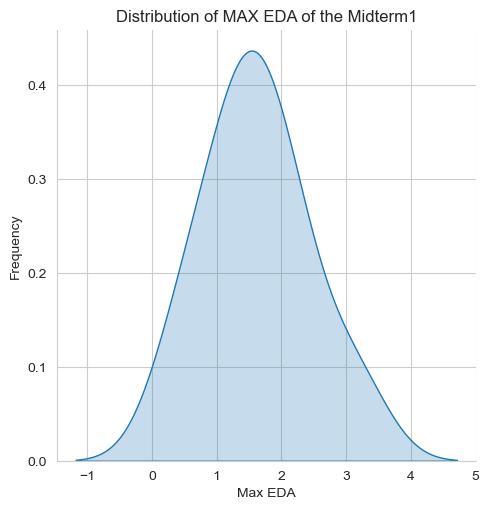

In [88]:
# Calculating Max EDA for Midterm 1
df_eda1 = df_EDA[df_EDA['Exam'] == 'midterm 1']
df_eda_max = df_eda1.groupby(['Student_id'])['EDA'].max().reset_index()
merged_df = pd.merge(df_eda_max,df_Grades, on='Student_id')
#Creating a Histogram based on data
plt.figure(figsize=(5, 3))
sns.displot(merged_df, x='EDA',kind="kde", fill=True)
#Adding labels and Title
plt.title('Distribution of MAX EDA of the Midterm1')
plt.xlabel('Max EDA')
plt.ylabel('Frequency')
plt.show()

<div class="alert alert-block alert-warning">
<b>Q58 :</b> Count the students based on Genderwise using count plot
</div>

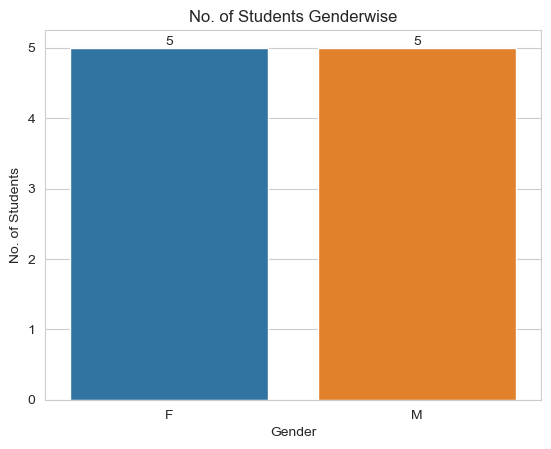

In [89]:
PI=sns.countplot(x='Gender',data=df_Demography)
PI.bar_label(PI.containers[0],label_type='edge')
plt.title('No. of Students Genderwise')
plt.xlabel('Gender') and plt.ylabel('No. of Students')

plt.show()

<div class="alert alert-block alert-warning">
<b>Q59 :</b> Display full name of Student who are born in year '2010'
</div>

In [90]:
# Display full names of students born in 2010

Bornin2010 = df_Demography[df_Demography['DOB'].dt.year == 2010]

Fullname = Bornin2010['First Name'] + ' ' + Bornin2010['Last Name']


print("Full names of students born in 2010:")
print(Fullname.to_list())

Full names of students born in 2010:
['Roger Frederick']


<div class="alert alert-block alert-warning">
<b>Q60 :</b> <br>  [ 1,  2,  3,  4,  5],
       <br>[ 6,  7,  8,  9, 10],
       <br>[11, 12, 13, 14, 15],
       <br>[16, 17, 18, 19, 20],
       <br>[21, 22, 23, 24, 25],
       <br>[26, 27, 28, 29, 30]  In the Array,find array slicing for elements 2,8,14,20.
</div>

In [91]:
arr3 = np.arange (2,21,6) 
print('Array after slicing:\n',arr3)

Array after slicing:
 [ 2  8 14 20]


<div class="alert alert-block alert-warning">
<b>Q61 :</b>Create a dataframe with Max EDA and Mean HR as the indices and the count of number of records per student as the value
</div>

In [92]:

df_eda_records=df_EDA.groupby('Student_id').size().reset_index(name='EDA_count')
df_IBI_records=df_IBI.groupby('Student_id').size().reset_index(name='IBI_count')
df_temp_records=df_Temp.groupby('Student_id').size().reset_index(name='Temp_count')
df_HR_records=df_HR.groupby('Student_id').size().reset_index(name='HR_count')

df_eda_hr_records=pd.merge(df_eda_records,df_HR_records, on='Student_id')
df_ibi_temp_records=pd.merge(df_IBI_records,df_temp_records,on='Student_id')

df_records=pd.merge(df_eda_hr_records,df_ibi_temp_records,on='Student_id')

df_records['total_records']=df_records['EDA_count']+df_records['HR_count']+df_records['IBI_count']+df_records['Temp_count']

df_max_eda=df_EDA.groupby('Student_id')['EDA'].max().reset_index(name='EDA_max')
df_mean_hr=df_HR.groupby('Student_id')['HR'].mean().reset_index(name='HR_mean')


df_records_final=pd.merge(df_max_eda,df_mean_hr, on='Student_id')
df_records_final=pd.merge(df_records_final,df_records, on='Student_id')
df_records_final[['Student_id','EDA_max','HR_mean','total_records']]




df_records_final.set_index(['EDA_max','HR_mean'])

Student_id  EDA_count  HR_count  IBI_count  Temp_count  \
EDA_max HR_mean                                                             
2.198   106.522138        S01        760       760        382         760   
1.423   106.231091       S010        794       794        390         794   
1.311   114.313813        S02        852       852        449         852   
1.651   103.283502        S03        803       803        265         803   
5.795   98.399456         S04        682       682        277         682   
1.611   104.806015        S05        654       653        388         654   
2.184   104.793488        S06        819       819        389         819   
1.485   103.842102        S07        713       713        255         713   
2.920   105.475896        S08        643       642        149         643   
2.756   98.802752         S09        654       654        371         654   

                    total_records  
EDA_max HR_mean                    
2.198   106.522138           2662  
1.423   106.231091           2772  
1.311   114.313813           3005  
1.651   103.283502           2674  
5.795   98.399456            2323  
1.611   104.806015           2349  
2.184   104.793488           2846  
1.485   103.842102           2394  
2.920   105.475896           2077  
2.756   98.802752            2333

<div class="alert alert-block alert-warning">
<b>Q62 :</b> Print the Last name like below ouptput eg:.Last Name and count of Last Name   Occurance  :
 Counter({'Doe': 2, 'Walters': 1, 'Jones': 1, 'Willows': 1, 'Murray': 1, 'Frederick': 1, 'Wills': 1, 'Cartney': 1, 'Smith': 1})
</div>

In [93]:
import pandas as pd
from collections import Counter

# Create a DataFrame
df = pd.DataFrame(df_Demography_copy)

# Count occurrences of each Last Name using Counter
Lastnames = Counter(df['Last Name'])

# Print the result
print(f'Last Name and count of Last Name Occurrence:\n {Lastnames}')

Last Name and count of Last Name Occurrence:
 Counter({'Doe': 2, 'Walters': 1, 'Jones': 1, 'Willows': 1, 'Murray': 1, 'Frederick': 1, 'Wills': 1, 'Cartney': 1, 'Smith': 1})


<div class="alert alert-block alert-warning">
<b>Q63 :</b> Retrieve the row with minimum EDA using sorting technique.
</div>

In [94]:
df = pd.DataFrame(df_EDA)

# Sort in ascending order
df_sorted = df.sort_values(by='EDA').head(1)

# Display the row with minimum EDA
df_sorted

EDA  Time in mins Student_id       Exam
4499  0.0           166        S06  midterm 2

<div class="alert alert-block alert-warning">
<b>Q64 :</b> Get the last letter of Last name of students using RegEX
</div>

In [95]:
# Extracting last letter of Lastname using RegEx
df_Demography['Last Letter'] =df_Demography['Last Name'].str.extract(r'(\w)$')

columns=['Student_id','First Name','Last Name','Last Letter']
df_final=df_Demography[columns]
df_final

Student_id First Name  Last Name Last Letter
0        S01    Barbara    Walters           s
1        S02       Nora      Jones           s
2        S03    Gabriel    Willows           s
3        S04       John        Doe           e
4        S05       Jane        Doe           e
5        S06        Pat     Murray           y
6        S07      Roger  Frederick           k
7        S08       John      Wills           s
8        S09       Paul    Cartney           y
9        S10     Janice      Smith           h

<div class="alert alert-block alert-warning">
<b>Q65 :</b>Generate a 3x3 Array using Random values between 1to 9 and Fix the values and position in Next Run.

</div>

In [96]:
# seed for reproducibility
np.random.seed(42)

#Generate a 3x3 Array using Random values between 1to 9 
array = np.random.randint(1,9,size=(3,3))

print(array)

#seed again for reproducibility
np.random.seed(42)

fix_array= np.random.randint(1,9,size=(3,3))

print(fix_array)


[[7 4 5]
 [7 3 8]
 [5 5 7]]
[[7 4 5]
 [7 3 8]
 [5 5 7]]


<div class="alert alert-block alert-warning">
<b>Q66 :</b>Find the way to reverse string for given input (eg: input:this is python hackathon output:hackathon python is this
</div>

In [97]:
# Enter input string
string = "this is python hackathon"

#slice the string 
s=string.split()[::-1]

l=[]

# reverse words and  build reversed string
for i in s:
    
    l.append(i)
    
    print(" ".join(l))


hackathon
hackathon python
hackathon python is
hackathon python is this


<div class="alert alert-block alert-warning">
<b>Q67 :</b> From 'Python Hackthon Dec 2023' give'Python Hack'using RegEX

</div>

In [100]:
#Input te string
i='Python Hackthon Dec2023'

#pattern the string
p= r'Python Hack'

#search for the pattern
s=re.search(p,i)

# search successful and print it
if s:
    r= s.group()
    print(r)
else:
    print("substring not found.")

Python Hack


<div class="alert alert-block alert-warning">
<b>Q68 :</b>Using HR values print even if it even number and odd if it odd number


In [101]:
# Assuming 'HR' is the column containing HR values
hr_values = df_HR['HR']

# To determine if a number is even or odd
def even_or_odd(number):
    try:
        if int(number) % 2 == 0:
                return 'Even'
        else:
                return 'Odd'
    except ValueError:
              return 'NaN'
            
# Apply the function to each HR value and create a new column 'Even_or_Odd'
df_HR['Even_or_Odd'] = hr_values.apply(even_or_odd)

# Print the result
print(df_HR[['HR', 'Even_or_Odd']])

           HR Even_or_Odd
0     119.023         Odd
1     130.879        Even
2     131.586         Odd
3     109.852         Odd
4      81.178         Odd
...       ...         ...
7369  171.387         Odd
7370  121.597         Odd
7371  109.165         Odd
7372      NaN         NaN
7373      NaN         NaN

[7374 rows x 2 columns]


<div class="alert alert-block alert-warning">
<b>Q69 :</b>Input any string from user, Convert that into a tuple and then find the lenghth of that tuple   

In [102]:
# input from user
str=input("Enter a string: ")

#Convert the string into a tuple
str_tuple=tuple(str)

#the length of the tuple
tuple_length=len(str_tuple)

print("tuple:",str_tuple)

print("lenghth of tuple:",tuple_length)

Enter a string: hello
tuple: ('h', 'e', 'l', 'l', 'o')
lenghth of tuple: 5


<div class="alert alert-block alert-warning">
<b>Q70 :</b>find the students who has 'o' in their names and print them



In [103]:
# Find students whose first or last name contains 'o'
students_with_o = df_Demography[df_Demography['First Name'].str.contains('o', case=False) |

                                df_Demography['Last Name'].str.contains('o', case=False)]

# Display the names of these students

students_with_o[['First Name', 'Last Name']]


First Name  Last Name
1       Nora      Jones
2    Gabriel    Willows
3       John        Doe
4       Jane        Doe
6      Roger  Frederick
7       John      Wills

<div class="alert alert-block alert-warning">
<b>Q71 :</b>Creat the visualisation to count the student based on race

</div>

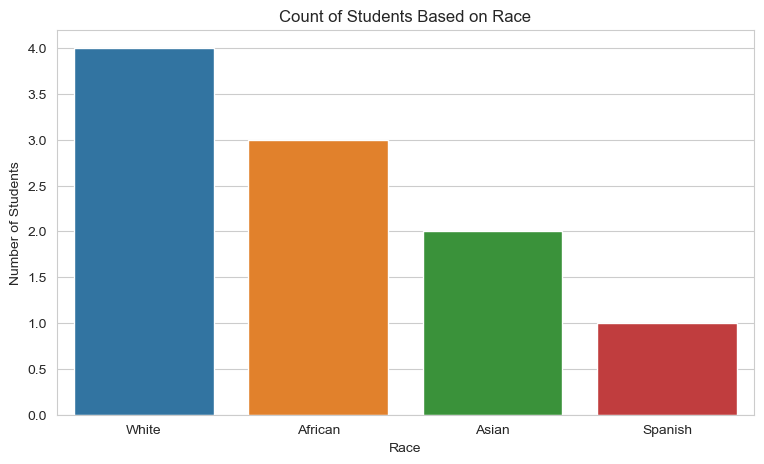

In [104]:
# Count the students in each race category
race_counts = df_Demography['Race'].value_counts()

# Create a bar chart to visualize the count of students based on race
plt.figure(figsize=(9, 5))

sns.barplot(x=race_counts.index, y=race_counts.values)

plt.title('Count of Students Based on Race')

plt.xlabel('Race')

plt.ylabel('Number of Students')

# Show the plot
plt.show()

<div class="alert alert-block alert-warning">
<b>Q72 :</b>select 25 different random values between 366 to 500. code should generates same value if we run again.

</div>

In [105]:
# seed for reproducibility
np.random.seed(42)

# 25 different random values between 366 to 500
random_values=np.random.choice(range(366,500), size=25, replace=False)

print(random_values)

[493 432 470 385 408 426 378 475 466 467 410 406 393 413 439 397 449 370
 430 463 450 392 382 384 376]


<div class="alert alert-block alert-warning">
<b>Q73 :</b>Find the max EDA of the higest scoring student (whose average of midterm1,midterm2 and Final is maximum)

</div>

In [107]:
# Calculate the average grade for each student
df_Grades_copy=df_Grades.copy()
df_Grades_copy['Average'] = df_Grades_copy[['Midterm 1', 'Midterm 2', 'final']].mean(axis=1)

# Identify the student with the highest average grade
highest_avg_student_id = df_Grades.loc[df_Grades['Average'].idxmax(), 'Student_id']

# Find the maximum EDA for the identified student
max_EDA_highest_scorer = df_EDA[df_EDA['Student_id'] == highest_avg_student_id]['EDA'].max()
print("Maximun EDA of the higest scoring student :",max_EDA_highest_scorer)
#highest_avg_student_id, max_EDA_highest_scorer

KeyError: 'Average'

<div class="alert alert-block alert-warning">
<b>Q74 :</b>Create a Pie chart for  Grades and explode the wedge with Highest Grade in Final and Label with the Student ID

</div>

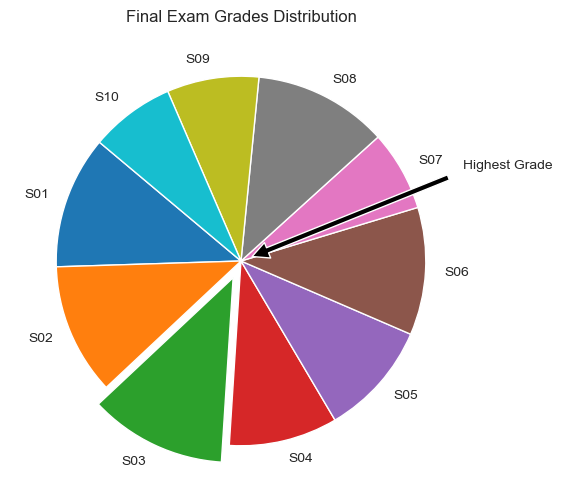

In [108]:
# Identify the highest grade in the final exam and the corresponding student ID
max_final_grade_info = df_Grades.loc[df_Grades['final'].idxmax()]

max_final_grade = max_final_grade_info['final']

max_final_student_id = max_final_grade_info['Student_id']

# Prepare data for the pie chart
final_grades = df_Grades['final']

labels = df_Grades['Student_id']

explode = [0.1 if student_id == max_final_student_id else 0 for student_id in labels]

# Create the pie chart
plt.figure(figsize=(9, 6))

plt.pie(final_grades, labels=labels, explode=explode,startangle=140)

plt.title('Final Exam Grades Distribution')

# Highlight the wedge with the highest grade
plt.annotate('Highest Grade', xy=(0, 0), xytext=(1.2, 0.5),

             arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()

<div class="alert alert-block alert-warning">
<b>Q75 :</b>Find min temparature of the student whose average score (midterm1,midterm2, final) is minimum

</div>

In [109]:
# Calculate the average score for each student
df_Grades['Average'] = df_Grades[['Midterm 1', 'Midterm 2', 'final']].mean(axis=1)

# # Identify the student with the lowest average score
lowest_avg_student_id = df_Grades.loc[df_Grades['Average'].idxmin(), 'Student_id']

# # Find the minimum temperature for the identified student
min_temp_lowest_scorer = df_Temp[df_Temp['Student_id'] == lowest_avg_student_id]['TEMP'].min()

lowest_avg_student_id, min_temp_lowest_scorer

('S07', 16.552)

<div class="alert alert-block alert-warning">
<b>Q76 :</b>Plot the time series of HR( every 5 mins) of student07

</div>

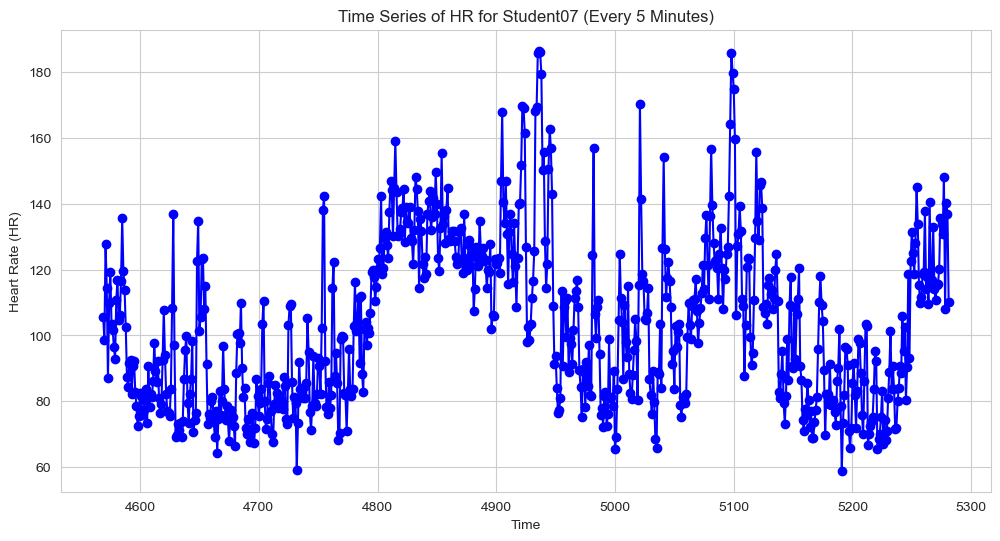

In [110]:
df_HR1=df_HR.copy()

# Assuming you have a column 'Time in mins' in datetime format
#df_HR1['Time in mins'] = pd.to_datetime(df_HR1['Time in mins'])

# Filter data for student07 (Student_id = S07)
student07_hr = df_HR1[df_HR['Student_id'] == 'S07']
student07_hr.set_index('Time in mins')

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(student07_hr.index, student07_hr['HR'], marker='o', linestyle='-', color='b')
plt.title('Time Series of HR for Student07 (Every 5 Minutes)')
plt.xlabel('Time')
plt.ylabel('Heart Rate (HR)')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-warning">
<b>Q77 :</b>Plot the Density Chart for IBI

</div>

<Figure size 1000x600 with 0 Axes>

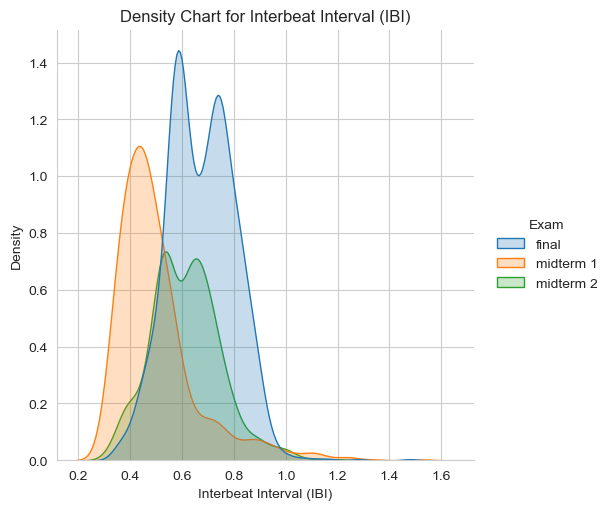

In [111]:
plt.figure(figsize=(10, 6))
sns.displot(df_IBI, x="IBI", hue="Exam", kind="kde", fill=True)
plt.title('Density Chart for Interbeat Interval (IBI)')
plt.xlabel('Interbeat Interval (IBI)')
plt.ylabel('Density')
plt.show()

<div class="alert alert-block alert-warning">
<b>Q78 :</b>Convert gender into numeric by one-hot encoding 

</div>

In [113]:
# Apply one-hot encoding to the gender column
gender_encode = pd.get_dummies(df_Demography['Gender'])

# Combine the encoded columns with the original DataFrame
demography_encode = pd.concat([df_Demography, gender_encode], axis=1)

# Display the resulting DataFrame
demography_encode.head()

index Student_id        DOB First Name Last Name Gender     Race  \
0      0        S01 2009-01-01    Barbara   Walters      F    White   
1      1        S02 2009-02-02       Nora     Jones      F    White   
2      2        S03 2009-07-12    Gabriel   Willows      F    Asian   
3      3        S04 2009-09-09       John       Doe      M    Asian   
4      4        S05 2009-05-06       Jane       Doe      F  African   

  Unique_Student_ID Last Letter  F  M  
0            BW0000           s  1  0  
1            NJ0001           s  1  0  
2            GW0002           s  1  0  
3            JD0003           e  0  1  
4            JD0004           e  1  0

<div class="alert alert-block alert-warning">
<b>Q79:</b>Convert ' race' into numeric by Label encoding

</div>

In [114]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Race' column
df_Demography['Race_encoded'] = label_encoder.fit_transform(df_Demography['Race'])

# Display the resulting DataFrame
df_Demography[['Race', 'Race_encoded']].head()

Race  Race_encoded
0    White             3
1    White             3
2    Asian             1
3    Asian             1
4  African             0

<div class="alert alert-block alert-warning">
<b>Q80 :</b>Create a Regression Plot on Max EDA and mean HR 

</div>

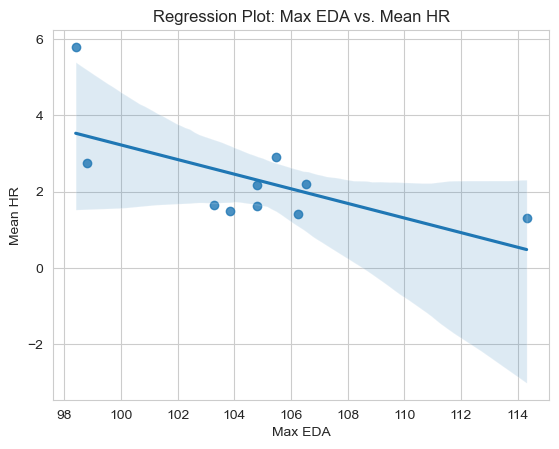

In [115]:
# Merge the two DataFrames on 'StudentID'
mean_hr= df_HR.groupby('Student_id')['HR'].mean()
max_eda= df_EDA.groupby('Student_id')['EDA'].max()
merge_eda_hr = pd.merge(mean_hr,max_eda, on='Student_id')

# Create a regression plot
sns.regplot(x='HR', y='EDA', data=merge_eda_hr)

# Add labels and title
plt.xlabel('Max EDA')
plt.ylabel('Mean HR')
plt.title('Regression Plot: Max EDA vs. Mean HR')

# Show the plot
plt.show()


# Reference


- [x] __[Markdown Cheatsheet](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)__
- [x] __[A Wearable Exam Stress Dataset for Predicting Cognitive Performance in Real-World Settings](https://physionet.org/content/wearable-exam-stress/1.0.0/)__
- [x] __[Seaborn](https://seaborn.pydata.org/tutorial.html)__
- [x] __[plotly](https://plotly.com/python/)__
- [x] __[HRV](https://cardiomood.com/2023/06/17/what-is-a-good-hrv-by-age/)__

